In [1]:
import numpy as np
from PIL import Image
from time import ctime, time
# from google.colab import files
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power
%matplotlib inline

In [2]:
# uploaded = files.upload()

In [3]:
def transform_image(name: str,
                    height: int,
                    weight: int
                   ):
    """Returns matrix of smaller matrixes from image"""
    
    # read picture to numpy array of size hight*weight
    img = Image.open(name)
    h, w = img.size[0], img.size[1]
    img = np.array(img.getdata()).reshape(img.size[0], img.size[1], 3)
    
    # last row
    row = img[-height:, :]
    
    # concatenate last row
    resize_h = h % height if h % height != 0 else height
    img = np.concatenate((img[:-resize_h, :], row), axis=0)
    
    # last column
    col = img[:, -weight:]
    
    # concatenate last column
    resize_w = w % weight if w % weight != 0 else weight
    img = np.concatenate((img[:, :-resize_w], col), axis=1)
    
    img = img.reshape(
        img.shape[0] // height, img.shape[1] // weight, 1, height * weight * 3
    )
    return img


In [4]:
def restore_image(rect_arr: np.ndarray,
                  height: int,
                  weight: int,
                  output_hight: int,
                  output_weight: int,
                 ):
    """Restore image and save it to output.png"""
    rect_arr = 255 * (rect_arr + 1) / 2
    rect_arr[rect_arr < 0] = 0
    rect_arr[rect_arr > 255] = 255
    
    # reshape matrix to imaging array
    resize_h = output_hight % height if output_hight % height != 0 else height
    resize_w = output_weight % weight if output_weight % weight != 0 else weight
    rect_arr = rect_arr.reshape(output_hight + height - resize_h,
                                output_weight + weight - resize_w,
                                3
                               )
    
    # delete extra cols from matrix
    rect_arr = np.concatenate((rect_arr[: -2 * height + resize_h, :], rect_arr[-height:, :]), axis=0)
    rect_arr = np.concatenate((rect_arr[:, : -2 * weight + resize_w], rect_arr[:, -weight:]), axis=1)
    
    img = Image.fromarray(rect_arr.astype("uint8"), "RGB")
    print(img.size)
    img.save('output.png')
    plt.imshow(img)
    plt.show()


In [5]:
def start(name: str,
          n: int,
          m: int,
          p: int,
          alpha: float,
          err: int,
         ):
    """Run learning algoritm"""
    
    rect_arr = transform_image(name, n, m)
    N = n * m * 3
    
    if (p > 2 * N):
        print("p is too big")
        return [0, 0]
    
    L = rect_arr.shape[0] * rect_arr.shape[1]
    Z = (N * L) / ((N + L) * p + 2)
    print("Z= ", Z)
    img = Image.open(name)
    w, h = img.size[0], img.size[1]
    
    return [Z,
            learning(rect_arr=rect_arr,
                     alpha=alpha,
                     N=N,
                     p=p,
                     err=err,
                     height=n,
                     weight=m,
                     h=h,
                     w=w,
                    ),
           ]


In [14]:
def learning(rect_arr: np.ndarray,
             alpha: float,
             N: int,
             p: int,
             err: int,
             height: int,
             weight: int,
             h: int,
             w: int,
            ):
    """Learning algoritm"""
    
    w1 = np.random.rand(N, p) * 2 - 1
    w2 = w1.transpose()
    rect_arr = (2 * rect_arr / 255) - 1
    step = 0
    
    while True:
        error_all = 0
        step += 1
        time1 = time()
        
        for i in rect_arr:
            for j in i:
                y = np.matmul(j, w1)
                x = np.matmul(y, w2)
                dx = x - j
                
#                 alpha2 = 1 / np.sum(np.power(y, 2))
#                 print(alpha2)                
#                 alpha1 = 1 / np.sum(np.power(j, 2))
#                 print(alpha1)
                w2 -= alpha * np.matmul(y.transpose(), dx)
                w1 -= alpha * np.matmul(np.matmul(j.transpose(), dx), w2.transpose())
        
                error = (dx * dx).sum()
                print(error)
                error_all += error  
                
        time2 = time()
        print("***step time is ", time2 - time1)
        print(step, " ", error_all)
        if error_all < err:
            img = []
#             print(w1)
#             print(w2)
            for i in range(len(rect_arr)):
                row = []
                for j in range(len(rect_arr[i])):
                    row.append(np.matmul(np.matmul(rect_arr[i, j], w1), w2))
                img.append(row)
            img = np.array(img)
            restore_image(img, height, weight, h, w)
            return step
    print("tyty")


In [16]:
result = []
temp = []
name="MonaLisa256.jpg"
n = 3
m = 3
alpha = 0.0001
err = 1000
result.append(start(name="MonaLisa256.jpg", n=3, m=3, p=24, alpha=0.0001, err=3000))
# for i in np.arange(8, 24, 1):
#     result.append(start(name=name, n=n, m=m, p=i, alpha=alpha, err=err))
#     temp.append(i)
print(result)


Z=  1.1208954050989592
128.72681441143004
113.65013890982584
108.52504413858114
124.41913964890085
97.29440470659367
121.44885248992091
139.16044605714214
175.40654412804332
180.47362412579275
160.65466791337738
136.78606958766653
183.04860779834038
120.07360744103337
106.74561002934537
83.45045723183637
132.86263933277604
138.50650606642742
113.60811675901437
81.12179449030118
111.31230563643756
125.16534582658453
106.11278455540125
112.25915583265473
73.94646524532955
71.95936951758816
82.17846454852534
83.2948969681154
81.5222010905555
148.6666148473583
93.47108489755819
110.11208062010856
121.02591834239254
74.62846040437644
71.82872655022786
117.67366972348685
127.60500919904597
133.85301810443565
106.30271004967959
128.74391962995725
118.85624959886948
123.63350125578415
87.59942251863843
61.03583373495137
69.35475675472266
102.39607483606987
113.88874353808035
79.02843702720708
73.2376194987404
76.70160371761276
85.81835961868126
74.96006848322561
73.58872490672903
52.5576054266

138.873177548484
64.23006984305844
66.60953264763909
73.39464808211697
390.94025005794157
13.34221625516033
10.31293430435592
12.25940522690075
12.267783844012975
17.832092060705474
17.08255546360357
14.369603760948406
11.012003731544434
19.730344448307026
31.72955490060262
18.741528869186187
18.4877196530459
11.53509550964945
12.353105752165826
10.250318278170369
15.672602496048949
13.873791036098442
14.000266660305668
14.808761928949407
19.025729745842447
198.94116579975287
117.02917212183652
130.84825224920877
129.41958227732894
147.42126535646418
56.9025971924163
56.39727753669487
66.71709149904554
526.9162889435281
15.578760900059628
8.659756114243011
10.882174402391325
10.889707533482108
12.479410536858369
11.486338941275553
11.371533755909192
12.265855199746278
13.152564114722942
12.10118704943116
7.39095280473487
11.419705204519937
12.999811683745529
12.506885663377142
10.897352184625563
14.458220279705825
12.976666085997982
11.398782076500133
15.655125983241676
29.516130778429

25.45552102627806
29.757662710615012
22.71891231914698
24.58347343306452
66.99234015983583
10.88111036149946
10.273620830736974
90.694233017341
10.118248694701315
6.816560235168312
17.036142221210298
4.032953494907595
6.721087955345187
14.194669045636582
7.599342532781303
15.606887507722844
4.8095653577819935
12.582153911761367
13.416283414418354
15.371094053834826
8.43275722242187
14.981912052876583
15.087339140749215
16.31592450695569
6.658625835076388
35.59358373654926
40.55551581847158
39.161917623542266
27.540675010938145
23.82704271760337
21.40417750151373
20.667797169651337
40.96821104443307
14.995721064916562
10.425207190135303
40.93069744894295
16.040813860189385
16.055240504460322
21.607976360545337
36.07893411461996
5.902934564194951
6.801723542881676
5.550703018711634
13.049011955597917
17.8161459402714
30.47847972748528
54.12047777174949
13.569077817296785
20.89969332369328
17.880998675268284
9.113351070341233
20.819510459303476
3.8378690109590576
8.987085318540677
127.831

11.006904769404743
15.81796837658009
12.448613174327065
31.86831315883139
21.478704212874085
25.85583166038191
21.535715793439863
35.14004552772099
42.767164246640434
114.71040255294758
19.219874095806837
14.32271735899861
23.7350095124222
14.043047395461834
17.048333483702372
72.6013173344603
7.324634512072134
6.487251908962645
19.699430014056993
12.74895749703691
13.84521267647166
8.136794497714993
23.848257614771594
4.795920610200896
3.8778244542833997
6.534590478170432
6.793030980625955
50.618802370036995
9.708109475870133
8.162045040880397
8.474463628248197
7.852261922489622
15.663218195649685
4.902859688844993
25.435826686935194
24.91656957221319
48.93606260935818
39.45283030763602
146.68129985974875
14.282622225508037
26.262533757122767
30.542934393964266
11.907208809525516
19.794701345180624
69.974578032262
7.8290807104638676
9.386109327324931
28.37148367914297
9.500822673047157
14.813247810397723
7.6763520528652665
22.63720903026712
12.023338818349913
8.06127646314189
14.08894

5.665546659842248
4.0286015794742385
2.131786527097584
1.7154719084623795
2.5275480086048447
2.3531794324528974
10.372006308707169
14.669019038636621
73.48398484594766
10.089375891814669
16.0512386743431
4.310434891566546
11.13781053039659
11.224923860124754
2.404181055344748
3.080106283531723
13.069545634177482
8.215532816770907
5.2374475299548084
8.208047226125114
4.129323845154783
7.406530487492932
2.931610784997554
3.183987415868287
1.7145678583703392
14.864771039884207
7.466132181056498
9.576876042524544
2.3962167389162192
1.1250039244500045
3.453360920882425
1.078853528610411
1.4292051911745933
1.2432534391649497
12.098440789510816
19.193274234265132
22.465667537499552
14.345412835070354
9.526273488009402
7.53663939832009
5.6093985413398855
11.73087892239001
8.616375703143644
6.881627894097109
2.0307308952611742
8.455243127926718
2.644261300876639
4.652489492641236
4.205746239827997
4.276770624447005
5.461041504172249
3.9243489735248946
1.9208230205019658
8.067464470579091
23.357

2.3454639897499807
2.6573148668876487
1.7707045956785123
1.325101171847445
2.8906790528966724
1.6680376422172372
5.569575373657142
3.8042586981825917
3.8163946144136243
2.977853148325911
7.166392279048954
4.256847127009788
3.928955998867065
8.435282861627279
2.707041548163887
8.36990363031917
7.690098816114869
5.826789350342078
3.612447261703784
9.310124313122328
3.2263450423470568
4.562575121392769
19.24010420660267
3.095914386653577
4.089500653180104
3.6828480059119144
3.3339473072843857
2.0802832503615702
1.8114244872365313
2.0234847857903326
6.6961771260065746
1.2004921355302363
2.5675445452821197
8.561430990562855
8.757297907582926
6.1634163686114185
1.732662248922276
2.8855860170798775
1.6148562789357797
7.277886145545201
10.05418338508964
17.71679790248744
2.3546968959290577
6.3508068113072245
16.16428923712558
2.0202288571355957
2.2003946082380086
3.70457310950244
3.85020604091344
6.091824356928319
19.644114890904003
10.421851727646285
5.570213724990177
3.1691525137022345
16.23

3.734035618206067
6.3145086809219215
2.260343517602378
3.9325045777078325
4.716481347188429
17.87384872980867
11.562158527038768
13.78702268310063
15.166686766985793
18.374714418687894
6.142072954522138
5.793934705975488
3.8509192302734654
11.513670524037446
6.710623026700048
2.650102809410223
3.158314428825333
3.716330658814123
12.152805689182475
5.087213342730672
2.531593809598212
6.074340840064684
4.628881342520756
4.2457253034046545
17.23693121469954
13.61816432312348
9.814156389536022
6.08078005281273
12.246382438127572
6.243437186155804
3.488008278908585
5.973505467616972
2.6129681382996903
11.689942022716735
8.124453531688012
11.221504523966646
10.943980685744988
16.85773279610522
6.009226390056766
9.24553850156759
5.95062440298034
6.1703993995105115
12.760166668283711
4.017425927680908
2.9247092033891664
2.9918728683673055
6.470796018290843
28.52551828024789
11.598173305922177
12.97449893895609
5.128432456876326
5.621901955484881
10.144030323545337
2.911724402345479
17.48933503

7.971781140978468
5.941415553065779
8.16716165886175
4.045501616208652
4.713933733799266
11.002265850990566
8.117603033488459
12.839383595919394
10.923666628592779
20.448174515987244
4.7746413910455985
4.007125229093394
10.24394604366763
3.8313784771604062
3.8498626640863343
16.310213728185
19.756997463482183
18.156964494217753
3.3519376196600725
4.4334190828716045
3.509874157162563
8.249951718814033
21.91724903283783
24.083915189204347
15.582686411247055
20.555136964694697
9.232826155066725
11.984614551496199
9.833737194676909
5.609744490092066
19.69050450562348
4.230628120968764
4.3247464033347995
3.028297493895701
3.9712865913629782
16.609362713860673
3.173462635282965
22.916660118287982
9.508512616788089
3.635966842018183
5.789543550035433
5.541920228010561
5.818192962492576
6.318026939006365
20.81764147702011
8.333898217585379
9.31030551585945
8.23783434913914
3.770279685908869
7.202581949860406
23.219602334630395
17.26680531101062
24.212909835073518
33.83924345229676
8.7959057255

2.390338183108389
35.150985999351924
5.564251254707744
3.3155750269090296
27.59340102985206
9.107379832116223
14.798528506144466
4.708904147645267
8.846254310173176
2.9279238429605714
25.769456989157213
2.9539029265194947
3.3878490276250037
9.082558939961936
4.972615094567861
18.977089563627572
9.688028757184707
3.8243969597516068
2.53481747877235
2.537700035647308
5.564347544503169
9.094696161188763
7.246254898804135
5.60636551757789
5.392565228520701
3.6595952484344227
2.460750466263803
4.399336787956713
1.9400055322128051
4.743807719170685
6.496922581677734
4.244039890847902
2.9838579500128617
7.727057162506524
17.28558093165666
5.282293639167605
9.684097080130794
7.358755324650182
2.3238659757314104
20.776536594758035
3.397283403077676
8.214676618131275
3.439487130729699
8.545513113371085
9.05731890517033
4.646931156657686
4.303602634921838
2.805641002328499
4.210853657022386
14.317767364741293
5.532827768287835
13.720225458158502
5.256162798505468
3.605676632576166
3.1529209053111

5.463133270883444
5.940526623965352
2.572082643012563
6.638369555678407
2.520570842658234
4.321308229411691
5.165639267089081
2.8338194916442374
10.780801577186141
7.958474507405242
5.609032572027464
11.326628138521393
3.882972130983921
2.4876119400492076
6.572829288828085
4.896106834442039
2.4586935132779026
1.1666133766876456
2.646714110421696
3.334004554200504
1.2779954676702907
1.7176743554790175
1.4605252682982692
4.613051894591202
3.8018443165493956
1.7623121098274648
1.3387636106374936
3.6334068481961035
3.708809340539405
8.747720004182993
4.557040416555023
2.8986306499557455
12.595492700751056
1.950211754471268
4.357574115612227
0.944988120687767
6.007404304426851
2.7212562416562682
2.1744742571501225
0.8860031532785321
9.412983515229069
1.3554376808384194
2.400984092944663
7.632474542571639
2.751245056447973
1.5885557793606322
2.765009199220935
1.0514632486585793
2.4643746756249167
2.607011440287163
3.04180625512971
1.9138458902422748
8.488414810722794
2.5964111978003874
2.311

0.418396999563605
1.0589286214611981
2.422828947429826
0.6039955152943294
1.4615220603322785
1.2161232141347376
0.6832802857988449
1.9585879471575025
2.1303906715944994
0.42469086462074634
1.6528276276508542
2.760145257549401
1.8024617738501045
1.5321896190731983
0.6330602999029628
1.3147790561274668
1.4351607241049495
4.608524186840673
4.224903166146963
1.5010692770745453
1.8553887179297543
1.1457429762722557
0.5856474280756491
0.6642596101198127
3.882215373235073
3.689137477977288
1.1064061355140877
13.458336703995103
1.5573102487966863
1.8385058486966033
6.229918405709294
2.258428809811057
1.1374211418155473
2.326696168514404
0.7510070448989824
1.0331039595432012
1.4348369581276788
2.4426037073622244
1.486146987816352
1.6775010067029876
0.9751201921184798
3.110951666547568
1.0904545245902781
2.0249908231060227
1.6078077078083748
5.641989768784405
2.5994750598108363
0.9845202309484425
1.9674930265257062
1.5103710700382487
1.613898366042215
1.3699086311924722
0.6170098487606351
2.2645

0.42853477261154277
0.7492053537580038
0.5842508045555567
2.493095745634728
1.4783842422239066
0.5384420855246422
1.0243068314019783
2.1757330899560556
1.0932186110781232
2.470734497759256
0.4351188268527342
1.1552199220658281
2.842274373334444
2.7180469021147564
1.1565530579569998
3.8715777004535874
4.660933871619601
1.5821184550830552
4.504262259752939
3.2763021709977087
0.3538473776259025
2.2190150221201885
1.866793996650336
0.9774121004302528
0.9812089979965706
1.3723359304649276
2.8569709197620914
0.9351455905739069
0.3724638137040484
0.668873733660362
0.3633195386933947
1.168339646736571
4.947108879093735
0.9188822318426959
1.5441685860817924
0.22041788433306198
4.948600203929101
1.9079239139094484
1.496559693451382
0.5396775358568761
0.7522363179568523
10.842196285722068
1.7133379789267595
2.9201320502486867
2.1085620881566953
7.878598064743917
4.139016212411502
12.397129421565847
5.785682388598036
1.1898872956314896
3.5619080909334735
3.300509098083539
1.5955234971347738
2.5783

0.36782949655530456
0.86902470984415
0.760951862342268
1.1897232650877263
2.3514630830916934
1.0365048846280955
1.4444496934671711
0.8722985462606199
0.7037649414785238
0.882350575058805
1.8155475083942432
1.5223676005390707
1.805904896429192
5.751467985888117
5.821816071887824
1.294601992992715
22.794061391834358
12.957958986144186
16.519201362672653
26.699180321213603
9.285829670584015
1.7781889213694035
0.3469742456926574
0.5261046080028957
0.667601233552405
0.5545390099969895
0.32106968886589
0.3165997264335217
0.366071913528498
0.7054040043577556
0.8238207463549485
0.4229905991235582
2.062738445397192
2.2051047963859243
1.4174952423560345
0.46765857153370366
0.7531696088777384
0.8300682334136771
3.1609870493997727
3.883288274515491
2.752236874688547
6.863789285291724
3.723554719453554
3.089493611148567
1.5227709157711518
21.89297426198786
15.541388023743634
8.120467058120676
11.81224292664652
5.853508658830944
1.3821439657868644
0.27912740851288975
0.4163406701363309
1.19696984414

2.634825696087914
1.9353335532029718
2.1433014304492244
3.868637571907044
2.160366897582878
2.3141370743755525
1.3114421903306734
3.487007621617187
10.9134422916584
1.9554873011717022
6.277345581003429
5.714145619152118
2.0304448408831837
3.325224375781411
3.522033971349732
3.521091687268334
2.7546195716978037
4.356250963095835
3.904281525147504
2.1420155290218297
2.483105371620126
3.586394771977259
2.1452791174775405
8.822051260232659
4.626198148776572
4.133112112640332
5.144237141524668
3.18022065698201
2.999989404641126
2.303058222318626
2.758397724928397
2.2873818265951726
2.5854899975850762
3.4192715067782173
1.524671383363266
3.4090375132564508
26.58750708161367
9.332181035287073
3.264951310689868
6.468044489413829
13.137121853925064
4.90331539227457
1.9690620367729532
3.479268688326404
2.1078094836964283
4.233851510657924
5.896202790863768
3.3303630233315564
3.634378304085105
3.2254863845818047
4.974541931612506
3.1422603615194498
13.735611555641215
11.437922635799223
3.03229341

4.582025939614635
56.887632136615494
3.612123163828214
1.8054759295576788
4.915051108825946
6.14460204991174
2.198496384549025
0.584525297204615
0.5873688093432653
35.02922096141318
4.674031472094457
3.0199856766765585
2.5326602969398104
1.5610659033613525
1.451883395443098
0.7145619348402906
2.6489953103912662
2.7265285789521987
3.1483011453561622
4.4178354982101915
2.113663936936088
4.146994112434089
2.6534412449773908
1.3037080553589717
1.3892339718588
1.260381255260634
0.9132632582196187
1.0108314913260172
1.5415196443219503
17.060364785686208
16.1116214812844
4.082365055013541
2.200458528986958
4.288154651589307
7.275759373130902
1.9153424470329703
0.4673861127302918
3.2673591962797555
33.00014964110636
1.9432565344222759
1.6381317684685262
1.6097946985131075
1.941030558469406
1.8895530437332633
2.939171885938591
2.0313653635991495
2.6768445668554444
1.8204546209509964
3.050795752817817
2.497755151185383
2.2288751760217975
2.694708300417313
1.213346117714342
1.5421738299100791
0.8

2.6451265854507535
2.889410627454993
2.0449796335970185
3.7768225879083803
2.625062045475972
7.326480434924401
3.518954143728996
1.4428348180647397
24.020434023485446
12.102112532265993
5.949992328788697
10.229283119799017
2.5786603588270838
0.8498044453539437
1.3606435075633172
1.3815617988451303
1.256873397658621
6.347580580551542
4.418843011910538
7.788524736098519
5.2726088208872675
4.720250171848616
4.899761194339012
2.531755130964387
1.0166036676729406
2.5308778671114034
1.496823626086708
17.21339399157759
14.505122649508921
3.0577854341033905
2.8939251316469576
4.18435365101698
2.4664334389099474
2.298548741196385
5.695402219790873
0.7765299390096124
0.7133867639707222
38.47149364192508
4.099232775945526
4.530379077041353
4.87541071975832
1.5102507375951284
0.8761086042455459
1.9780469136514853
3.17830072699046
6.472815557697065
18.419888714374554
4.149745009110434
3.8414926704970425
9.076031083473831
1.6398831192180823
2.772098919408873
1.5230864838418323
1.2609092425853918
1.2

22.756493765015144
6.574465505364407
17.634108463039723
3.9887815496815433
7.725413128909749
1.8637906708013878
1.5487019670044775
12.896993405475678
2.230868551806744
4.4959230376150465
3.617018032782687
5.794171232154442
1.264739482337075
3.2819542302918414
6.7786826860889935
4.857798652487456
35.228562404201455
2.4398440004509494
4.814777356444775
2.371059817535782
1.64584092782295
6.9629503975913165
10.745311870564187
10.657971289454666
27.560623323668135
22.294032009872133
12.286372761343117
6.155832987022115
11.696876422806712
15.287070834336799
10.116624083000344
5.441284924520204
3.674118050578859
4.6149582052963
0.78375366850401
0.8999960174043415
9.476152970565899
3.649077151737533
2.834947918193922
5.1225307801359685
2.261915168867042
0.8283570310821793
1.8462704406384265
7.549181421843527
4.14549548241336
19.62894385731673
4.388687632067677
3.383707000422676
3.074425428502436
2.6900461639119815
4.153223061894669
20.801015244199927
7.269963136725887
12.936418602548365
30.729

4.380215571182598
5.73548361042324
4.631378443275031
6.080787753139599
6.296474053661174
3.5888181577313834
1.3162076574274928
1.3199512723261335
0.8467861390314028
0.8436628263707121
5.48310523735674
4.361771399445909
1.4496537611716518
6.2843280926159775
27.224670832487135
5.036894892864808
9.142884647431003
13.586176934293015
2.300596614437771
3.0453784203282073
7.040423388979166
0.8425352530097754
1.2445201978181941
3.0792230431346157
0.8491075374667973
1.8028917405552312
4.418451378258131
2.8734800709521546
2.4772478083447065
4.065649108525653
4.9998912852624535
2.5228369970554274
6.583349721765131
4.918118699396603
1.6167368406120917
3.3872597605202555
1.6338083943444341
2.3103519614094306
2.228802344817316
3.529115997074979
1.449369791476578
5.4369166780750255
6.060673796406356
7.634964694661339
14.198984707047583
5.9554422184669615
11.262485823600711
1.6400692103169576
4.573261078310553
5.227998359245306
1.74836086357281
3.823096832295195
5.963979681154968
1.7765049383547973
2.

6.296860700419563
4.227275306929177
3.046923882408068
11.796494286272356
7.306493992631742
3.94084316974816
1.1056549132539828
2.394195228043159
2.3706664663362833
0.6421846472968248
1.529468255786949
2.9562022289958416
3.4938670413992767
1.4943387744854908
1.3952995776708772
1.5321987133537796
1.2773277288914078
1.2057818422166728
2.2181115908740785
1.2986839781286568
3.472591972582078
1.7055868579824802
1.58941460643487
1.3487495875558113
0.4443225340216478
1.6479256002488283
2.4292070780564403
1.8506910172208755
0.6559356209706194
9.322949200511852
1.8872116818288054
1.7492723124600513
8.983306538996136
3.1244201358567283
1.526526526270702
1.2375376161039877
3.146315378223654
2.2377114330456442
0.4385492019363946
0.6160777245873359
2.6307002679809703
5.889080481479009
1.8047057377442433
1.0547687858310144
1.2175151964191637
1.1541104874979529
1.2323438233831492
4.741537749706853
2.0536961611207123
10.600801550826139
0.7416150339722603
7.089440363297299
1.4764221322583186
0.597465541

1.5536528136273025
7.5577773488156454
2.7799381022339973
1.4128224366316726
0.670187981447484
9.810401106180988
2.421519692695473
1.0490643128786095
2.351135227537272
4.088842053547233
1.347877431864662
1.5703115147476352
6.508426970179718
5.45239164248039
5.387529985049312
1.3823269394044104
1.1584987536890727
3.4264722294448116
0.7603146163087977
4.294418298240194
5.436173755882253
2.2818986155854355
2.5176349696502744
3.799721461927996
5.152888715067509
2.167975808373206
1.0624160157732727
1.8810830433524464
1.1842757028861024
1.6861886988536159
3.785714744649193
1.2339973531431636
1.118563934151575
18.44093745298594
5.199778247122335
1.7740413114280484
1.1946871349228259
2.378622008878275
1.7657057636615137
1.704802782245742
0.8940230660619345
2.7642311615862196
3.868437136703892
2.335066162861252
2.9154444850622423
2.471055952590416
1.0493832915430028
1.7402774686417626
11.788667910443765
6.213348404265399
1.8903247033379336
1.1552906503511726
2.9924207906849194
2.4204043122311094

6.710350997826042
8.036542639664237
1.5280737409077612
9.286285201347175
4.72155498557947
7.494219943793825
5.3279767841739405
2.0794217847644103
1.5266858638130574
5.623887520244703
1.9695175729797745
6.721999166152338
1.3824126167956816
3.7418674093919466
7.145973567219158
3.067676211950066
1.452394186063595
1.5781202007949644
0.8663585720191552
0.7220495534443717
4.7084845058876095
5.3379384514891814
16.1461538146789
1.6478952975741818
2.1242446913638102
4.994488089385871
2.1721209626385987
2.558093997705665
6.301167113079758
6.083054990458181
5.47282692940902
3.1413336924509414
10.582520560589758
3.002032571268736
9.108925576182312
5.6926414899449
1.0894572452865199
2.8724627431257055
2.1500402202131346
5.092330192953249
3.6576445808744076
3.992915022264732
1.5245555133054802
5.767462087887492
3.4822238879339
2.635128920153685
1.2414746917709807
0.6829505436516772
1.9306291035395826
8.67891487412521
5.272795908779386
4.246791902868093
2.764649201579588
2.9649437486083023
2.39086270

2.687066288046023
5.280046735708477
3.5868571390685995
2.7821212745761774
2.4580830548563117
1.9713830589344972
9.077874268420006
4.343311454914436
1.5765601187265526
4.474511279750131
13.292197716178855
3.9797181336776912
3.700800928641278
2.197192623467392
9.558636621379769
2.1052031070709805
6.9617123570747035
20.32715217919963
1.3607693729895662
0.6955596675025872
0.9145957977007183
2.057814626503893
1.1855149376573793
1.7106253001332175
2.7104683477166143
6.037046112663739
3.9713531807091713
3.768767760531162
3.0866742516086694
5.133433258323004
7.8083109459416535
5.334192516927547
1.4663997629197603
3.4601501762824363
2.6736115798675737
15.387624510582931
1.8884106910910794
2.5758826824367524
5.82015149793184
7.774212368562376
1.5319234607679133
4.8311094234205925
2.3587703907980235
7.151532856503645
2.2008066975597584
6.2846803632406445
10.691774018852229
2.0027847370023895
1.681982401142613
1.9409769324466235
1.799349312692791
1.1140077693640085
4.758309774724801
5.608415135564

9.873003588544584
3.8765516244722855
3.6903826736036547
1.7154933596756692
1.590907919111536
1.2201892427354686
2.559867953818138
4.48417323987241
6.513403032050604
7.070141617328055
0.4509603532507448
1.3978924396830084
2.1114873021318723
1.3008422671471558
1.336340399563145
4.250953554211585
1.4490417183391258
2.7807331357204026
8.251601644391044
29.762585102329858
2.3193673134478097
0.9744680994409107
2.0585650371280244
0.6032358824321404
3.4391902658014835
7.37477485350077
6.70235774635334
1.1584742412994766
2.952060973156478
5.926447418658221
2.664427253985343
1.5466101703804471
1.7196659659548352
1.189926752810881
1.679930913115296
3.8017846821267485
5.268286700366311
1.7611196103587705
2.621173766481689
2.5860151008674115
1.2288844958611842
0.947390496570472
0.6344749013931452
1.5565522714289597
6.155229574860727
2.3983102689924385
6.874304177974822
0.7199817056441429
12.131695247255417
1.3376936911487938
1.6682430383833817
1.474591745597135
1.4950303317031597
1.6648198625981985

1.8111885374787313
3.7223122484935733
1.2174946767168664
2.965218653635591
4.395182680950846
4.620300452196407
3.2475577099245774
1.491482785378286
3.3802494792436675
4.464493903098791
2.217880841419054
9.890535358014272
2.6649905794965507
2.0444397370108724
0.6108588500160591
6.683246721602842
2.558549329202857
2.636821411337796
3.0398339103533423
9.361620504737322
4.864143053496001
5.006939983112871
2.878596261674325
8.807929095104697
1.4470479979774824
2.1141914305210543
9.305652257958076
4.281226517365799
4.046597284384271
2.370630558436713
6.116479229899701
1.5187853859315124
8.554923456813523
6.287471801903117
5.470006945415945
1.9033896047357244
3.6606141055549206
2.422539694890224
5.822466666474056
10.616451746123808
17.751372645367205
9.388357383883536
0.21824777416039515
10.473169761325195
2.214106043129292
10.212818571137742
3.120494657400264
3.5296077797338867
10.830651288589895
2.52703762749823
2.1582537221917333
2.1129704288515607
2.5738204209185636
1.247064835945223
2.67

9.436261579310548
2.3940590504381456
2.549489181442214
3.5720282436226847
9.15662901702755
0.7341127908971803
1.2261707032930724
1.5618127775845698
2.2949515096071966
3.3437956250292924
1.9322665521327447
1.1897983457695562
1.5063201836113844
3.6070994120575772
2.0580059764726237
0.6196971941328953
1.873587161704263
4.698068186660803
3.2144458616289047
1.0188021149911022
1.8093424606610335
1.3292446267234137
0.49392833804028274
1.1858297236597928
3.8478997378764075
5.576558921267886
4.093738279450052
3.209147275861046
3.119160753470026
7.20628425478611
2.2578486119280257
1.3190963215415092
6.846997624784427
2.6466891578266347
1.1719087457058852
0.6236786564576099
1.4141566122301799
2.5560029831671036
1.3777335487833475
3.793679535428072
1.0029385749407371
1.7770672104538408
2.000550905965177
0.5187673163435853
0.7025684028269694
0.6282521059063967
2.284795251442151
5.050557118087121
5.78958232274758
3.47992441752172
1.853273030803163
0.2045848999740365
2.5961913065512223
1.761496810330

0.4419659442647858
0.351919422655124
0.19678102583661367
2.3532758725696166
1.150187726466299
3.9469872566290247
0.54880634459478
1.3179633262657888
3.5617482346606817
0.9043231198665558
2.8681842480543795
0.7417880112349635
0.8201153102642142
0.7018153313816746
1.3013740907727187
1.0706627452975164
2.160797124746391
2.597569075064624
1.4865024903174553
0.5239970166501339
0.2936213846510149
0.76984828829584
0.346811501301008
3.6189542589796853
1.8951165930527338
1.9258854246793629
1.468199924475433
0.19213494348024107
2.4852265469099875
1.180386687123858
0.6223604744085722
0.22313335532369313
3.086048933276616
1.268994069862085
1.7450158349181504
1.4500738484421296
1.5327430192732827
1.9668485321324642
1.2022657604689153
0.9912558600365695
1.1829471562463922
2.133002192069339
0.8187952655453928
1.7344367278319306
1.0544819945009398
1.0838693159674841
0.6022122617413178
1.3768037740558987
0.32407875029923383
0.549283085486468
0.20245479672999644
2.87330368307362
2.4575878166574667
0.647

0.3350921059576004
0.6894866781922715
0.09918023073065507
0.08424264613994704
0.25111664365765884
0.970779703657027
0.47850601713952623
0.5006390372355058
0.7741754468091564
0.3853962621486332
0.5967489516492154
2.743144300644551
0.9174874339876276
0.36268466222254475
1.7438303693722252
0.6023001503091058
0.49940196169920825
3.6293617801065072
2.3916469768023374
1.6710046915343908
3.020041966438858
3.328049220836513
9.94707967830868
10.679619285551041
2.8548914843493014
5.329738107925292
0.5497879284033456
0.7551025426976885
0.5014220715400168
0.9094587204718872
0.7774028059146469
0.11901639074358986
0.48316446453425976
0.45564006069764446
1.442140850549171
1.019984690207837
0.9918805951861477
0.41284464029860196
0.9892063723907205
1.6656807354116199
3.2291617807584236
0.4895647307228126
0.9429924912753753
1.3480832568132437
1.07123018679721
1.5842328264336067
2.8613265910478236
10.542990989661044
0.9533531920880786
1.4212130883017042
6.858780613831663
29.314908344005158
4.404335342310

2.3888302619386037
1.3762689098514043
1.5050617143252294
1.2324652426954512
2.7873865182356696
1.6641911695295737
2.2480318995439985
1.39619467272597
1.20313364591651
1.4762443747836538
1.8800448787162332
1.5372341530448677
3.505888959113121
1.2429104550347576
1.3124241748532202
1.3838744440361022
1.3229225371207254
1.4057720679935497
1.0425273483568025
3.3636379563236773
1.8475713972736887
8.065045720957771
2.7059754807824263
2.0342235948238447
2.1323755059448954
3.3590349684373053
2.0078030452628957
1.4068873572331386
2.9250153090866373
2.261929600659203
1.38718908868448
1.4456722550934753
3.4660099143375462
1.8975303343545917
1.3296715801194945
1.5974212835937585
1.2893869080766867
1.214928679601667
2.0106871178805763
1.2019123946976942
1.9187312287360263
1.4245178259977889
1.294205436691
1.0292014713984454
0.8392684771341689
0.9055917994588818
2.734648639138439
1.5018186583309676
1.7065954433673376
6.5527018598919495
2.9496579596282313
1.596421871670432
1.4601650271994868
2.5030149

1.1333858535420973
2.3446470036358824
1.41731810260804
1.2052679981069856
1.8943740330453336
0.5640306178338587
1.4654903423037275
0.7148343018075786
0.7781369281730091
1.5242527102411831
31.053533035302834
1.091692253850869
1.3356930680852874
0.7868267829813907
1.1910879515242796
0.6494262340574628
1.1512078081503492
14.017766485157235
2.530756480168576
1.3943964900792662
0.888433337641397
0.7649373349185141
1.2161033856817198
0.6584009200851818
0.5627967912076925
0.9996375013609754
0.8069437716520875
1.5598796203884686
7.711005093257915
0.560529031804301
1.833523426146099
1.0028248196297391
0.8280635905246386
1.4535372667187305
0.6141414561618821
0.7643617860973196
1.075263010552056
1.3416928685315843
0.9728020866548386
10.233850377815822
1.2655657842546266
1.5507007119621585
0.42731155851345914
0.7374589422611857
0.6884761961246306
1.9197709838777373
14.651430552372174
1.0984184135379642
1.452413153511091
1.2095597221315393
0.908521962683525
1.1310258038888314
0.6781543669742458
0.7

0.8332558814475374
52.23606647952095
1.6788377977375155
2.562988944868342
2.21278158103307
0.46266337908677124
1.013378616925651
0.5950493852300869
0.45345393195924355
1.301961190539943
4.88718560785451
7.833789805883874
1.4580606521967883
3.2884198734916725
1.648703118023033
0.44186766428519847
0.49265057653313604
0.40713306816959616
1.3356940861472997
1.1503240938205048
10.637714352731845
13.459805645215555
2.9638583176079276
1.541352088077923
0.7480271924559662
1.3044078289898795
2.0536205609469254
1.5411088510129765
0.765474410696442
0.8864466803646314
28.236285462664707
3.918867819786297
1.773405355043235
3.795105378465794
0.48046165695702686
1.0551931516349928
1.1038262886203565
0.5160591354947425
2.477252125085185
8.83354490663823
3.30010958238537
2.643365542650878
2.2682177365190777
1.01036479499925
0.5286964611054902
1.005821380922663
0.9237534359822143
0.8173863893347131
5.107804318320902
9.845584981588518
4.572097483344647
1.4633847036950447
1.2284706478720593
1.745138054704

1.682991807847955
1.9548302096886851
2.06538982516881
3.2273939098017608
0.3140443443640232
0.6275764931249679
10.610876768462381
3.34587717657891
3.521149771792021
4.832543439697509
2.0969995310393696
1.8593654926314853
1.353704394851178
1.7008895464647693
2.34731908373698
13.545997054552352
2.1935071723055186
3.759313418206914
0.7272050083139738
1.7534647927377387
0.8938511531225293
4.096309714235103
6.676914166959701
0.8549739131578261
12.200247636269376
1.6902836614185814
6.116446864025493
4.714684181502707
2.2054371915286466
3.0741718756738337
5.129737629871513
1.3207453323973573
2.533849407265488
0.5707716830382791
1.7969891758631436
1.4356529450459874
6.237348182264543
3.2074813504296165
1.9269623835581169
3.4563492910310267
1.6728978625115263
2.655477306582766
3.472030245283889
2.3388958436144933
14.801396932860717
3.4595746225066675
2.916997216679856
1.0171786793608053
1.8384130264660405
2.132942515084386
2.215423090982088
6.153565415016731
0.8484815812382254
10.37205178529869

8.352503555928141
1.9345414550381816
1.6078143866401198
2.5306042834773335
1.0412626570775745
1.602276096536764
0.9846187973969963
1.5619440418394457
1.5335863427192218
10.347957477924242
2.115720333926624
1.485824886034694
1.9329834253269305
5.461423873831353
1.9668242806261897
0.855244724046137
0.6977297695828746
1.2259468300727625
3.0720560277952074
11.380745863425538
0.49096866191442756
4.345957207060025
1.8712414140496532
1.4161999355955506
1.19604412367063
2.463082742814704
0.8506366712344898
0.8769986411880744
6.174500017938267
4.9184440233325475
1.664226391514632
1.1861993424810708
1.2482318765074607
2.040351299535966
0.8155292081239938
2.2672733580712365
1.3126105181730945
11.524793220380534
5.5761620765755735
3.637392024899699
0.5537152012459695
2.452033742743536
0.5914696145821611
1.8912383919273044
0.98309355296945
2.3036993355660096
1.5656800554038028
2.896193529101115
11.150757845770972
2.0864412918888227
4.447985759747883
2.5603514334717956
1.290768529804317
1.0756546758

1.5878299522437123
0.5863372493615733
0.3932489226032362
2.644025886971655
1.6444831407957516
1.1575668492671052
1.8826481991928725
1.253016541795003
1.166808260938942
0.7032818660214697
1.0065203404941703
0.9754627550157622
5.655122971740781
3.6380080558235974
2.634754396600881
0.9724523231697002
0.48229517729459537
1.0909869140920825
0.29962905684283586
0.5345872221953439
0.23124178395364992
4.361289269308384
3.4627164864283486
4.570243342709005
2.2123335488349443
1.5265708178818538
2.1213740185447403
0.611206953155456
1.4381610531550806
1.4895429289876347
1.3681301780786166
0.18840203842685535
3.016221318145848
0.8787660875974046
1.0764040800757497
0.6024345444613404
0.6413951466793897
0.8350741254511468
0.6858091265805963
0.8087643425906338
1.740473748936302
8.772700943139938
3.3652842630559716
1.8144460980386596
0.6575252769536505
0.1657376206822675
0.5402483449310773
0.6045494894279847
0.22350035691261105
0.4505093669459245
4.7825969101870145
1.3177251100433496
4.509459220900079


1.8920908259978093
2.018572018570172
1.9913575341306364
0.7901783901904764
0.9642780436351903
0.4468908335356456
2.3832395152351427
3.3442585490318164
8.921750098735108
0.721684588339321
2.357721892982495
4.366478074933762
0.8347554498163524
0.8017241186916294
0.6807364671877691
0.9866944954366544
1.9850286402986277
6.886891342708019
3.115840354497924
0.8207632158657421
1.1127566850622015
3.585362804377314
1.6798346837834406
0.7903675588443314
0.45989397903183715
0.4371998476979934
1.565016021240694
1.828269861485524
0.6299150653678132
1.5574467688671167
2.4039021910988256
1.9902222066495632
2.0299171260097992
1.0930994319184295
1.172422253197547
1.2013157433579393
9.907053854027096
3.8252679396606974
1.3551055440057398
2.0700867336877176
1.6776957970568303
1.5035619914019795
0.9890955682563614
0.6546086064661197
1.7189057159159804
0.9855450957747203
5.553045915653348
1.6866849166283222
0.924220282926071
0.5952062671971656
6.062319142102403
0.41581433076831126
0.4934502754263155
1.4686

1.4738994576621836
2.027411142968039
2.6880040968229544
1.775466765795895
1.6894080295670435
6.693520299653251
4.914594795969011
2.902515125985829
3.1381218243161686
5.593124033040885
2.4454049904023383
1.3594688337987395
1.2644318987554155
0.663554308683104
4.029852423517352
2.3627817773205115
4.7037001187330585
2.4297229020785607
5.135714925403185
3.359459200041523
5.74647415341111
1.3290187735006171
1.332848994663248
1.437482841804457
0.797218695355899
0.23060890990869504
0.4738196111146599
1.9209252688169223
5.6423080655757705
3.7385204916775674
5.989492142321105
2.1251850404738897
2.4536868945587855
5.295303688334655
0.8694524339711482
2.379854410174037
0.7219342782360185
1.623191760695366
2.8364905635919273
4.9944523694631675
0.8589469989333754
0.3442307950884151
1.0680940273889294
11.299601462830122
5.009583695930712
4.177718433171461
6.2955387494195305
2.1906646125890648
3.2025931956278564
2.551719662447843
1.269023144985217
2.6242939099302047
2.3288266067860097
0.9514220037849

2.4787061320262014
0.43428182680437244
0.6988844351288482
4.842438193529374
8.406446616068564
4.444873035111154
1.0491857190789715
1.8829368109898326
1.6669457916729251
2.3435555876706986
10.385296521254235
7.356031710494122
6.4861432359963445
6.830014652120893
5.671502382429965
6.777002196564986
3.1796369113707157
2.1054844722498838
6.898602425044339
1.628340638907918
2.3467234165181816
0.545086679272711
2.5001944327762944
4.842965255308237
1.4740340196254798
6.099268064858065
2.6603978277476887
0.5903298110369597
1.130152033226487
1.1264878070857258
1.5119438891717614
1.510970653592296
3.2416470071918186
4.698505789634936
3.608886045094798
3.236499864953361
1.6070180041436901
3.4270665164694116
6.5542210627912
5.057405474760216
7.712688419918457
9.194367310930115
3.0755748551868156
3.185457068485392
7.372075424572211
2.4433490593475837
3.207175488764223
1.9249013621979727
2.9177705253635926
1.8451447552117626
1.1187659148507474
1.8202028809118878
3.846845339376702
3.892822240960413
4

2.8902940849194665
3.1890785724665145
6.039971343065726
1.0900056391145092
2.9239535274702044
3.4618612835001734
1.1820530578004576
2.20523411097932
2.9407698583367368
3.5923669562240055
4.220773385728952
8.400369393110921
0.1858635589397527
2.6205774093575847
9.987666284339133
1.332955936721257
2.325985003015819
1.8871746274939087
0.9233147752103474
0.4656809323945898
1.118421957614509
4.428339700914228
3.1370975205246907
1.5394102003100583
2.1461210623798923
1.2463367107177665
1.2544810554697705
1.3886379186394708
4.100784174304959
6.6946878581792495
3.05608702880076
7.216369156440768
1.8607756804062443
17.096044266292658
4.370269431301994
0.407370212408388
1.6726948753918318
0.44057157694520166
4.016587089851386
3.1449468660253577
10.901632556167415
0.6116073536033197
3.249176328795784
2.338733523760372
1.9538182188830577
1.4881345641593091
2.4173349760964067
0.49889599134548207
0.35596273966835446
5.301563010485424
3.716583535121331
3.6304724863049858
1.7325850330046206
1.100604539

4.328183032687987
1.1295822216067952
4.438431552427781
4.207221677668412
1.7372325922508756
1.502124103131892
1.4788433773395275
2.691654020614408
7.341926815602479
6.047027626507808
1.1983607253307853
3.472513402200401
5.773460868251253
1.3925169102799255
1.2118013201561708
2.1705192158951876
0.6546846776329478
2.5928552371729787
3.673703483899078
2.928589746666844
4.184315708165757
4.539337174808001
2.7092324960566656
3.4056713011266866
1.696881435079372
2.3480486435875374
3.5427195002051337
1.24699035272562
1.7140462749018406
4.968949858897289
2.8573395512578323
1.8273241657482782
0.9075406986588483
0.8751155607376577
0.3663281262648939
3.1793073614153466
7.663276347511444
6.343954963546552
1.0583360227198255
2.3864275640217345
4.559040634427548
0.9355248483963482
1.7632363084219227
0.6690141695660623
1.6964247280886098
0.3252120224387546
2.9955513847822175
1.642620182096776
6.200753039477771
6.379731033286815
12.314371883383334
0.8360386322316711
2.2754490875489606
0.56841188479264

0.5381568549931477
1.1755356914493769
1.3717198291860655
0.7187114074166855
0.7320585882519071
0.9456839287551315
2.1996514407685765
1.4228726498204993
0.9430644031261268
0.6963577090537765
1.743222606617151
1.6102470111355396
2.7658050568963914
2.4945110043772996
1.755692142058469
5.637476024515222
0.8781142087010572
2.314527102353045
0.3736318825992759
2.8766006318163924
1.2630373282465768
1.149122429675795
0.35426262623082055
4.094165208954047
0.5784962434368653
0.6246495420296833
3.420419988244998
1.0295624200758866
0.7289184750536335
0.991171231468704
0.6783380339701294
1.4046667173610161
1.7681775090809946
1.554059649743238
1.1649397513569544
3.7940036230233183
0.8949548335547359
1.025473204763858
2.1966448695222502
1.2983393822279987
0.8397242520723314
2.54318643753218
1.0562832975277598
4.524465632745549
3.3061696583849836
0.11542741047315631
1.1148958028030456
1.7441253607848066
3.0769716571856076
1.8598761011312304
2.447944905052848
1.3788426806369916
2.7344014331512994
0.459

0.4722490428140606
0.23842136217199802
0.38999395894592614
2.3313769314429984
1.2388538504763271
0.6164388239361195
4.949871034841268
0.9254114888512712
0.7188755171732145
2.936654160692626
0.6906588946757765
0.46618412206811577
0.8272611027608245
0.38319479596284794
0.4941357947665652
0.7071041690373716
1.0044435809868322
0.6643248608609511
0.5299059061472264
0.5702480495195322
1.8071014629240587
0.51784180345343
0.8834287928093741
0.7055883551694011
2.0510009761495
1.3788818531603568
0.610927131097261
0.786412352068408
0.4903818396555318
0.7741776580723165
0.7023836541831353
0.33396408698466196
1.1271119377612275
0.48492160276700796
0.48018113751207775
2.2350155029522654
0.12187815217638664
1.1908608514922296
2.067897878113453
0.2207436060159141
0.8002013089152771
0.4626059087144023
0.09586846470954578
0.5465084566943226
1.0280193082117288
0.3822809243529266
0.5412086360353288
0.718437804086129
0.20594035121206578
0.7753339464708632
0.9796104196405068
0.5709065482004213
0.60259029037

2.1027301862448784
2.345021177150389
0.9994043253660382
1.5046871888581816
1.2432471353008112
0.18749608234193077
0.8641525462229551
0.9245383359458076
0.5974760292736079
0.5098884477649976
0.5553682091775769
0.9243156507762498
0.5739333748012494
0.1462381413706882
0.2733317892346621
0.13407428098655938
0.38484354769160367
1.865992175414492
0.40225306093448276
0.53403048204674
0.12130482608637647
2.966855245399538
0.9567272508505995
0.7188633834044931
0.2601259639697804
0.47966781930451863
4.973909122348424
0.9035766414576943
1.6509400621905546
1.3736806777571813
4.412755796305804
1.699127948560583
3.827015970712607
2.5762313965306256
0.6784788654910524
1.4400856716076325
1.4538380479629203
0.6239293887009227
1.1759433940423163
0.7538629510915751
1.2328477990989073
0.24849454833625145
0.5248471557231907
0.8189327623655182
0.24373642657220781
0.484242415592027
2.127855024444198
0.1757791972383342
0.443349552306837
0.6971063868468118
1.0477400142160116
0.7731865983295749
0.54127684234008

0.5309876929660592
0.7474673737525966
0.7064545196951817
0.5348803992183877
0.495669228171368
0.15558886075793815
1.2418506869199604
1.3491564733500132
3.9387917453334573
1.535165802733581
1.080991380026891
9.460676522646525
4.11618953229882
6.836820654856023
20.267222310005987
4.394542684793348
2.3830223361325116
0.4451223836824936
0.34535853650868675
0.4240648417025643
0.1353740016683929
0.11444928013226112
0.3713587416058306
0.09153846348473964
0.27923353661692263
0.25932565085057063
0.06930216905345625
0.8559605515941637
0.6403076855921835
0.7631751248075418
0.26182169375447095
0.508652689382264
0.5334165607076613
1.1008086168004552
0.8421593856231263
0.9397447953308208
0.9100630818120076
3.800341145470932
1.4294602883621057
0.7026687415541486
6.022866499517538
6.282470358550418
8.35119080396259
5.672697613509994
11.424282679025593
2.3275959229380914
0.2456016465827823
0.43758496524661267
0.5089536937893759
1.2040111077309161
0.06766716217286974
0.11551283216750399
0.26837944481720

0.9946575013720642
0.7484170344513243
1.1703633378949125
1.0243184310572335
1.4013317298528776
0.6585902263717561
1.3187887515332495
4.288897741152375
1.0217698098313124
0.9906558317860914
1.0015976566052633
0.9808318257937407
0.5910263407093257
0.40807207845467103
0.4296365635274585
1.2866179405784481
0.4361840339399677
0.7822678505567205
0.4659811704885139
1.8835756672130795
2.857488557843789
0.5747456203444623
1.6012450575909127
2.0679265526750354
0.48705433728198283
0.7926915766490336
1.0200653029858326
1.4396731051137257
0.6686603518067418
1.1607273845554507
1.7794379849896902
0.6985340874337997
0.6413337396698822
1.340075570446357
0.6130617204240607
3.769300943120337
1.21289984634264
1.0400497729093732
1.6011637466885653
0.7903479953019005
0.9923408825390175
0.5407289844701935
0.6167613814169418
0.40729055323329605
0.6663804104495613
0.9659337348152738
0.4439604995689995
1.6956161741446887
7.4729200376382865
2.1248772093069337
0.5696657758414356
1.6663353924308462
4.9075489774037

3.9140419693313673
1.8463001827384051
0.6742710463376733
0.5775022186847553
0.34231094072197893
0.8867442923060431
0.5115239361920634
0.35883699912113814
0.3469629521916093
3.1463187264888934
13.981725574249714
5.2560344201428375
0.5908054268396113
0.6043192667277495
2.805773758076745
1.8038128723693203
0.25236405814909096
0.9094980484222254
14.543720228102618
1.8589099587398528
1.3772045485955284
0.6796906366017875
1.1385022962564944
0.8875792605210806
1.0555229834034145
1.2250714786530355
0.6960179024052487
1.6270225398718685
3.809574206106094
1.6264262768434954
1.6673363951188898
0.8773721820640428
0.6978346480422783
0.46413624591200636
0.7524853430389195
0.36286169871136476
0.4467800248620391
0.865271655844867
1.8463943355370003
20.9975223200116
1.095906438529369
0.3263656564242636
1.4044675601116123
1.5083920425994197
0.7210232305039572
0.3515683306583233
0.2864879307232507
9.489160287933407
1.4092664679711504
1.1298796470051433
0.8394754407696094
0.48385029015085274
0.55934919814

2.815220749915776
1.6682010457413912
1.9580157338337314
1.4234226574998352
1.0658842898867973
0.6362361745024522
0.27614824051688786
2.132064162068729
1.7952371995756788
6.075246040700951
2.7355434467983195
3.7483446921930916
2.187598050059055
3.312257493451205
2.069923078647898
1.0783021102801689
1.544016626981629
0.6055986660756669
9.513212180847768
8.10650220345248
0.6392563087756191
0.8039792280033495
1.00485806366255
1.6642811887470632
0.4261562648843887
1.244755095051436
0.4661651206870403
0.6642332441437633
19.92608882826655
0.8677670461489765
2.0557646187613763
1.415256484614083
1.3268875783079082
1.6413259287403161
1.2925879180767883
0.781398690924707
0.8116175209075913
1.8583139705336502
2.520699046576331
6.293399598249415
1.3962100114323621
1.8495789464392458
1.892912802448367
2.257212509089547
1.509788645883866
1.0100424948953413
0.5880074227031882
8.773168379075537
6.019509733834306
1.1879415223483762
0.7131463723992386
1.0169956322358453
0.7987775843893712
0.5030784316625

2.7557429904620587
2.8178421490593557
3.0822029462548928
5.2685914770216025
3.6796696775609385
6.057723821114873
4.923652741232784
7.535180664820509
7.159346136185121
21.421931611563714
1.7265989257171588
1.9962326934434247
2.8582616397849945
1.1041263643579222
4.426988795926068
3.2898195173247076
1.2445722656216078
0.9809088757556308
3.2595526802728054
2.1706345627856334
1.0000681669633456
1.0619604320095997
5.275179177272805
0.48148959567356997
0.7146105053193818
1.6492474784812183
1.7962536251727494
10.874358700631744
0.6720772560517416
1.4680036544634334
1.1469213293131062
2.724894070420518
4.7242169038761155
0.7210737131915075
8.317811676688935
5.386138008959777
13.858082149841175
3.631417187741154
5.631970083988462
1.5651273353685904
2.4060212922912836
1.651949839361538
1.044847281898951
0.7472213538123504
3.7150924243615786
0.9256259808691095
1.964323474337375
4.357148143296844
0.7839565453394396
2.0112267318848147
0.7837607648817905
1.3437325311699164
1.1689543472930564
2.28264

0.947370210648977
2.2103708727802864
1.3250055985710631
4.225665558419542
0.9807800463041485
7.088701826430079
1.713051728586858
0.4982439251825307
0.5753955880523256
1.3007243099580674
0.48864498628296843
0.2925712543284771
4.793985426533918
0.43934070702391503
1.0519587520122742
0.5573430550325608
0.791858952587752
1.0226311324259638
1.3936133646092068
0.805789840175499
1.4560754493410315
8.731774112839844
2.8966343600573317
1.9949647555795764
1.5226261635475409
0.632489042364341
0.5358165135514802
0.31713770992700924
1.0728611552514749
0.32058135172079105
2.144241468964269
2.433147846906512
3.1678945298581107
0.6143846830757239
5.341366904097681
1.0692272223551476
0.39866225456097815
0.8048384805251377
1.091426307314306
0.5501696311830422
0.28937717914279937
1.9623696940767024
1.1003979003104873
0.6576141761077572
0.38878518571233456
0.6189227410498072
2.3052773536305287
1.2511732455921711
2.247067869467996
3.0868990371285205
12.024277467001758
2.118443434208881
2.74899371819728
1.1

0.5519481991049348
1.8162842150803953
1.2151749769983011
1.9491648640517885
1.1801280080070915
3.4414904824217736
1.4426813990089906
1.0324790455933937
1.2763038637087127
2.302523845105494
6.226997434040357
1.1789413837248333
4.393087233474707
1.8418214945113276
0.5961893207880082
2.509041857194534
0.5686753996452998
1.7941931334222185
1.0546849417087756
5.010324970928074
3.3790450358457877
0.4016169517878631
0.4767802833651913
2.403259122136314
0.5671956665225458
0.7187824131010642
1.064064494256494
0.5955492055648028
0.7843913895592012
1.2942195906476814
3.5046759979604833
0.6418522706163131
1.6758554380991504
1.2569346197987112
0.7381672122177997
1.487092030527792
1.6392038739172514
0.6381476140123897
1.669759288348165
3.387961115863565
1.364187777362344
1.799714194883377
1.2905936696598552
0.5794322208086768
0.6148601323872216
1.7392583843652532
2.335275430958048
0.4854946150443279
4.920629522985976
2.2822173358197957
0.6976410084207129
1.5658167998494028
0.4104638864415257
0.39990

0.3291409625182283
0.6163742485228049
2.451824638874117
2.8325919955300733
2.9946956742166257
1.5724312214545615
0.629551245275466
0.26681408845309174
3.7355312549997834
5.27676803508118
2.423397735492627
2.1413224649560343
2.0834953251620827
3.26343590691136
2.092167609545056
0.3702917912886767
0.8480796052722872
0.4101493566412975
3.156473938753851
4.25798832017705
7.216687463471557
4.707328820071148
6.391475435147446
6.847067051026811
0.8686184142389173
0.7678009737928221
2.0090264537293905
1.0013760568326329
0.3283315703754733
0.46693664514468225
1.5712402971688673
2.611133965389907
1.356717409557169
8.850131607093497
0.5551776914672714
0.814323291735023
3.4198091184184576
2.6373034079557716
4.97052296886064
5.720673548745593
2.3515948495577312
1.821460494552943
8.602514486120427
0.20717141100838882
0.6582106976457193
1.161879516041398
7.900746524130641
2.51460797649671
3.7847982937308946
3.5326583482565947
5.538135255284358
2.734120147352865
4.653918963112558
1.4042749228969853
0.

3.898120133139861
2.476262423259506
5.336236489024532
2.7157506849060478
3.818911303343371
0.8002372629571268
0.3805354277188625
1.624932806167971
0.2429633864571854
0.46095441814178806
3.2240065187950773
6.635543054500341
3.2703996130437245
0.7815641500788221
1.4442754213991174
1.3424894818731274
1.7449654354057402
8.156136061040005
4.7962741554764605
4.9787567810836855
5.02940072242842
4.689085185102619
5.714594022102678
2.369848845083418
1.611767400079429
5.1729853239767865
1.2888069578024468
1.935736687269641
0.35815931532910766
2.0909103432769625
3.3815168364880304
1.1495102192364242
4.266634195414678
2.046515884269493
0.4223867724301768
0.7382553078915447
0.764949067546156
1.104799753591115
1.0022350604745809
2.2409555536051964
3.8885499032258712
2.866450554271196
2.602314186504018
1.2921526388740305
2.9046446954611955
4.391048270757326
3.4728865095031596
5.446522300547132
6.084066693634336
2.266348278883175
2.5165577316486405
6.329273942565494
2.023059798445087
2.664112805299666

2.3952958689771116
1.72373223206831
0.8200995156140771
0.5993606919900795
0.3997987704215109
1.0738017604112753
2.245013044491426
2.8453031182643116
3.123613660207111
0.33189863869146724
0.8894848709689944
0.8612532707068872
0.7617514584761546
0.6545767241717151
2.211247364512652
0.9775155150847636
1.690059329247035
3.8458512802257045
19.271626912343837
1.2426902241588687
0.6228453726079474
1.1861708066010959
0.3918692499319074
1.7953663927286732
4.179880452403822
4.243759545114291
0.6683971605385589
1.6205330749528721
2.389561947858597
1.1763138861829445
0.6986742560746935
0.7769203666047534
0.5864420922753149
0.8077610360096888
2.0332952340204082
2.209721678127198
0.792631468733204
1.2094472257797746
1.832793895049932
0.8004004699576429
0.3957743581110977
0.3277143622302914
0.909833176338268
2.9984741323385253
1.1444291993350328
3.5806102939312527
0.47917238052333033
7.256537748615905
0.6588636752085801
1.135481505226765
0.8179568039340297
0.7855048456836972
0.7577141294534883
2.9915

0.5107747227387383
0.7443584613270293
3.1531494498515364
0.7673060134009184
0.7472151446713677
4.5832375197973585
1.6092619917825377
0.2664525155498883
3.3668653205816
2.391959695723915
3.3855626414689235
0.37347387835543067
2.6525370764924956
4.053435543578842
1.7558388774259353
0.6275479798281158
4.292766544709439
0.26454858869571096
0.3501925645386251
2.6690214006548754
1.9590748388468435
3.879286529193389
1.2186272747914666
3.022669577565138
0.6344479329028506
2.0489372513898614
2.600082717951646
2.7743823987291094
1.6269970340933824
0.7928231578950296
2.3560349630597752
3.2417343533167875
1.5659185560999302
5.207885117329765
1.658118245847501
1.493147403846042
0.42177216689944336
4.134543204030915
1.3880220408784443
1.5715226761645373
1.9908478883342464
5.58208920165844
2.468780866080661
2.0604210791013515
1.3897066315529645
4.8126567549483275
1.0273386309342099
1.4305697093049368
5.883089156096645
2.3005521008206395
3.011469025956691
1.2600141502423647
4.826357042426283
0.6992881

1.0372900226434485
0.8342777630224196
0.30723126433051107
0.7999914751848268
1.8937817440975644
2.8153873033012866
1.903710979928107
2.1517161839629226
2.026206301364027
4.156021924254549
1.169338016963601
0.6910735027229911
3.5177908492870644
1.794604189446256
0.821491978282813
0.3606718235720448
0.707965450353894
1.520412386201973
0.9214659531588616
2.4505615411004165
0.6135402107227841
1.088388942133341
1.2195627275477385
0.3178244139055063
0.3986322451401642
0.40827839490803564
1.1442440620144312
2.84659199808587
2.694534010263344
2.1576693254416814
1.0957071137501715
0.11119037884704218
1.4578115360678314
0.8420204126407589
1.8307700370074407
3.061062978485437
3.3606029922547593
0.6192703693323072
3.322672827557115
0.3866638897898256
1.2351608524211537
5.2937620691449805
0.3334920698406999
0.3055049749948384
0.29061061321683623
0.38504459630953397
0.7832194753847685
0.7649993010544116
1.3383023306969541
1.180970936393826
1.336679032104054
0.258771657699316
0.41614681338421805
0.15

0.34084427170478265
0.7473667376440334
1.592113866603251
0.529984857074538
1.6996733365250807
0.5297461435883067
0.4233903389953288
0.3616755999653684
0.6951440326341085
0.5566173285277398
1.0802921502554224
1.374195543798266
0.6669181212136561
0.2096258961622605
0.17072929702172845
0.4930669545628671
0.16675607200952366
1.9345444980554427
0.9800870336207529
0.9181812414020675
0.8621379595178449
0.11799535162589432
1.4162497709675148
0.624704384237338
0.32260142067182557
0.12014617800113114
1.3539699598202566
0.5959024259730727
0.9203689121398859
0.7842018708231219
1.0193977186604248
1.1329780418950532
0.7759572406986607
0.6395389882275443
0.7650540112907357
1.1131677367084316
0.41474165921689327
0.7545242141506813
0.5279798984433788
0.4842230728262121
0.31709700868532
0.6879020708981086
0.22349346683131888
0.3075970303030968
0.08062051993458386
1.4896605182381588
1.3046200268454728
0.41784483683260365
0.7800504608054298
0.36179452918602595
0.4890727903160527
0.5622826875893281
0.52124

0.5410601133662696
0.5858397624497433
0.2946207224288883
0.40168430158895396
0.3969356586892482
0.03804891526120491
0.2220867671488542
1.0418991400167266
2.5569229209305004
1.0788189696021078
2.914752848763675
0.783587023238891
8.25539431912714
4.919773689013825
4.808584383328756
6.2803570128300805
0.6333015053242322
0.3720900637955963
0.18906185245318513
0.2150481760616652
0.39366737538423285
0.0633775702022153
0.05632477348285881
0.13462756095844397
0.5376747742759492
0.2560433439421765
0.2599250757721732
0.4168399104874371
0.2275361283274684
0.38414939862360437
1.2525961153677576
0.5109731443656731
0.17657563679745672
0.9710071838362561
0.3521604374039506
0.2633390390342552
2.1343182911033853
1.3142574906554052
1.1304194630075532
2.14718265472327
2.314853464975578
6.2021517882897195
6.975553242944232
1.434215276028223
2.3989686598684057
0.30536918910236815
0.4767407390822861
0.31746920113391525
0.4771461215553089
0.3970057035674994
0.06825507930364792
0.21926443183945038
0.306837615

0.9190842731606021
1.079478912888923
0.4205430602675323
0.7250778083185377
0.3249014536331217
0.4923629735427896
0.4729740808359232
0.6807241662654763
0.8932160114328893
1.0979616433818835
0.533035755389531
0.4242523715515575
0.6786760323066431
0.3845505897504055
0.36106451972949694
0.7351903576410008
0.7880684553596609
0.897233353785357
4.36592183718818
1.5060964161418382
0.927884809894185
0.5084637708898325
1.5321173788732585
0.4317632060936243
0.4716628685293181
0.667808700984216
1.0583364568945788
0.5664828165382509
0.46754318233371445
0.5405646498089403
1.0423731110138796
0.6137782702019103
1.2511650240724974
0.6205779131892489
0.4616688450638154
0.39482768343642277
0.6150490323717097
0.6208643816514761
1.827610647594065
0.42427756968623226
0.6860296284918026
0.5852939057772728
0.39146893816558315
0.5535805801423781
0.3716638050882279
1.401109619558723
1.0045181711729545
5.333850853902007
1.3161536416767097
0.8806165761079205
0.9544031574682366
1.5407374448541329
0.556203156108200

0.43322838637484
0.21596672885751456
0.20439632564932525
0.49273730816050004
0.3235509929987085
8.129760996135566
0.9907803646970421
0.3499292130696406
0.6247180658731358
0.764029105089042
0.4657108227419976
0.4141872009492661
1.8182058442411198
10.094077740375194
0.6569968392507315
0.21571269924828693
0.35214095972836057
0.20636931101620537
0.37449239563227166
0.2200216167868356
0.1785999253476591
0.8495252807174651
0.6086697932702425
2.2505067748456775
1.1858909619981572
0.36491085659064615
0.5571730865651408
0.42570455679756153
0.6818605723630277
0.49901764939386795
0.24161292572757542
0.15025029436352533
0.2747682059065394
0.34899050011757793
13.280532305306684
1.1869428254355316
0.9346477374968498
0.34379695016223294
1.3870640804045136
0.31040193894033735
0.6365217210826957
1.1126828306916465
7.933388200184097
0.32935107410216635
0.3790718082324014
0.433802131902153
0.23949015742142776
0.5648857501233534
0.41448085025666304
0.3025346646198773
0.4205710647501603
0.713257787825833
0

0.5259023664050738
0.4966577958684208
1.2210657080293765
1.008638885592819
6.628477664825775
4.468924717846914
1.4225813013757485
0.6178358857687841
0.1761468046350809
0.6631893183810105
0.5106814715196226
0.7828611361974945
0.695860189631098
0.26977037810595983
6.784480241037791
2.123188592198502
2.5517891230068903
5.1753686906363505
2.3325653035493965
0.3222347305599821
0.29354149996046486
0.41576498505735127
0.6153176451906914
1.5931427812769805
5.249451476370045
1.7547264261753923
1.4223059872654653
1.3646386859386663
0.3288647533440401
1.1659007089044118
0.3454242017179304
0.5537527874485388
0.9711939502518415
10.89983702420209
3.4799775827524573
0.4072261145774794
0.2552016754988845
0.6372032848266026
0.6446386827220869
0.3220113726049087
1.1295406292192127
1.0774499630409482
0.45008132728147365
6.01308139708012
4.764187683337582
1.523138185176763
4.0883834979401605
0.9300509962404511
0.35765675999132973
0.38248902125046824
0.2959915093075675
0.1781834536124553
2.0029719797866363

0.7915636349101057
6.237026422542969
0.5704611472807464
0.9546448029621322
2.29396333777996
1.0384134331257198
0.2742752968193974
1.736002884174113
1.2300334492403169
1.2757824714353667
9.2168505337134
2.1821748206412077
2.0345009309592452
0.7776790488550386
1.1931459230622077
2.7162870762151576
1.3181962365205562
8.528323618736072
4.611215641937099
9.906222478144205
9.783677976687558
1.7811666313650314
1.1979635062535445
2.0424326906031736
0.5819534393026508
3.552090429240561
0.8541231010409784
1.800144502374054
0.5370524469882954
0.648786316316634
3.531825295055388
0.7980841571823545
1.2691163573325615
2.4053883787417685
1.207793680601772
0.40580217467531027
1.7869537060047147
1.5022013000166945
4.33261118420062
7.703682162514513
2.2368846302560548
2.193675811190669
2.4220222974115755
3.88505930177055
2.764039089100317
4.4806375982411994
3.7795257826198934
5.91243929805746
5.72042119381484
16.528358817037297
1.3769604185540087
1.5632243806898534
2.2802738298575242
0.8109984338846625


0.687973946863082
0.12053010397549618
2.095456611049178
0.5385270589481534
0.6111226452880918
0.30015511629592306
0.3124773414558157
0.37046060409008297
0.3414466041797718
0.5431061670699914
0.757227060687451
4.754911348861539
1.972174086141149
0.926929472713312
0.4019686720975437
0.08415217835778678
0.2734586234002214
0.3527782586213298
0.1199287030336861
0.32402028319306125
3.077405872885028
0.6944529809572069
2.1614910904300566
1.1274818757251825
2.2132676977458514
0.2434849837803678
0.33038259512891405
0.37215590390814035
0.8401654529718734
0.4603970164587903
0.3905199545247563
0.8077710954145377
0.49495939009622525
0.2457143608990156
0.6765867551155482
0.42390209857230754
1.1554926818139841
1.7591426476758008
0.36099888951036974
1.240663816120696
4.442592585395783
0.9491091695154658
0.5515173117350262
0.19914065591053606
0.28581439023929084
0.22702740696387663
0.9097002429253441
0.20718834977522116
2.3249271170098504
1.837580764903161
0.8072176563729547
2.353901864434462
2.0140564

0.6161885817396601
0.16562465763952836
0.18780290036847402
1.0247955949197434
1.0959317925971677
1.310964787020931
0.6759550953188539
0.49976013541279196
0.2855705171316589
1.3212100606414334
1.9601504058989399
6.0432564247194005
0.48524832939730306
1.5504891581925742
2.192231784877635
0.5940092331217404
0.5615640015491843
0.36445273615080065
0.545799558094863
1.0895598716698978
4.281548345497569
1.9153624079117244
0.35564792378508486
0.662405716146723
1.907437133646493
1.087350683000697
0.3956589660961415
0.24030272472889302
0.22897954738947848
0.9535880738691117
0.987175501862959
0.3434165574916642
0.9397867599802731
1.5461076113761718
1.0129610406801557
1.227671638454852
0.5660453430181902
0.7444972214325664
0.7273617218880724
6.149634988207665
2.095991337911663
0.846228631180577
1.2796524885514278
1.1596846950664523
0.7931169238087844
0.6349835899756485
0.3218820453288291
1.0231216168521924
0.5560063048243985
2.9454501960332706
1.0334786527236277
0.4313116832947044
0.34509085446892

0.8145785626517666
1.7062330772827068
1.7541710765257874
1.1376884626683457
1.1756750873854092
4.057481895355117
3.1371828621033613
1.8332309515664866
2.146681878148301
3.5985680747637683
1.5368268627043464
0.8877277856338576
0.5620539189641481
0.3782779512578774
2.5363880671948924
1.232936946215876
2.9016356435230284
1.5099211204526684
2.48704750155926
2.472129700508007
4.209171728466931
0.7199854526951709
0.7345784322529471
0.6632806874566659
0.5039688100229993
0.07701142123886257
0.24675076307369642
1.0960096145517524
3.06069103122918
2.1969246033308902
4.179447159843367
1.208048761376873
1.6114224659539722
3.982338863726971
0.6016757549123374
1.1464104913868396
0.4647860699613757
1.1914519261722802
1.7348678676590636
3.275436392744021
0.6317311822629078
0.18718256848938605
0.5803271539677134
5.856531831928137
3.469377408819703
2.602340443361803
2.9527240533323513
1.501247356159817
2.0513003626753488
1.6430404291130292
0.7521328872271046
1.3264454344640482
1.6340343417907135
0.58211

1.1417939168712359
1.3239327536164704
3.181721992956436
2.0278794850063804
4.5810180836745324
2.226613648208313
3.1904279998440126
0.6490635665816056
0.27584822714872137
1.1608072622947245
0.16499343057386084
0.34409826168241003
2.3014067878851803
5.5020797607162875
2.580142165407335
0.620789584155526
1.1563315186076453
1.1198483432032709
1.3975402698776218
6.6708643166054005
3.35271511890286
4.005567140313972
3.920910755839796
3.9689517351949015
4.9658387941118685
1.8999542118992185
1.3064135866440185
4.119921784029877
1.0846004631655932
1.6496167063875051
0.26363059123914334
1.7856900812971654
2.537161015356595
0.925481679520092
3.2068164694393846
1.6771451399733708
0.34658983883295075
0.5422562100943007
0.583562441355439
0.887394783438153
0.730302596840236
1.7316637864396869
3.310465296547344
2.3933330314585066
2.18771019369275
1.0901979047501689
2.533745664452877
3.1792509853838036
2.535989517939528
4.128827580876324
4.328775026282275
1.7704037767206158
2.0641958754720093
5.5344863

3.299185906707443
5.979764458621746
0.7397816872577742
3.3632849502337105
3.567557563975935
0.30534038384319623
0.1598734363720144
0.7360260263309805
0.4124390050508546
0.971902769668567
1.5504748628747143
2.141763653733223
3.9293138749717103
1.4184468274142765
1.938178431567937
0.9938601195744808
1.1292104516972707
4.045790816773582
1.7096740373844668
2.4160880653046606
3.514679457254025
0.7573005624645901
2.151729306012901
2.135969831320132
0.7485926256257321
1.389330606809283
1.6000046650832165
2.508300769649574
2.1525118251733795
4.7899002802686805
0.12773433249341387
1.812924096757533
6.41103712794739
0.7798094959710069
1.3991443603035876
1.1746267265354184
0.5310978190343494
0.2038078106393133
0.6735499877987461
2.9221111150069556
1.9069588876045795
0.7354435271457469
1.0432786642237883
0.8286492105402584
0.7807861897005689
0.8919703464156977
2.2268754272294076
3.6191913858028215
2.1428156065827113
4.186900248490679
1.365864936428123
12.303361694227485
2.2648729490844977
0.272606

0.2551248228236965
1.8220322135090066
4.27159275312184
3.1244789201878973
0.5792996769280608
1.6911956637735983
3.4486525666963304
0.8411694565224593
1.2419012555226858
0.44860859653844776
1.3999795642513744
0.19659936856681165
1.7838477894018003
1.0383864078256684
4.3714034076317985
4.13531230389593
6.824415665433891
0.44588513611719205
1.5024183136274258
0.31882784681268445
3.922901895384837
0.46850668146576335
0.8000204167120939
1.149765347479357
0.6442907036772696
1.7252948949353477
4.3133697131646
0.7321491218832413
0.3106383043200185
0.7286829605678071
4.13848565132939
2.536347405453529
2.115834378895747
0.39144718502350384
0.6913703937778373
1.7138876786117776
1.6176207224714452
0.4143572976414658
1.3161038873374435
0.5699754283743174
0.2650478464611674
1.7021224560373023
1.7968230667499931
6.883450715412081
2.1198864847107255
2.8858387836882127
0.5801146069906415
0.2752338291274297
2.7364098588651427
5.123820229505187
0.3418480715863832
0.8261645894766052
0.5089052549020122
1.2

0.6809292532219058
2.2365106124853007
1.3365180087138409
0.9031958319908937
2.2694654997021
0.4407663994921926
1.426739536309857
1.307106527281316
1.3103161840818038
3.1007367647055943
2.591541535210889
2.2435971695608092
2.268413894480092
0.8673850440715749
0.5344706083818666
1.5453845519503628
1.8892259300598115
0.4533916691061423
0.3479638981093651
0.7124015360440505
0.7991362545841322
0.5390085327063793
0.4792288509242111
0.6543185663548702
1.4340685260572612
0.8469431160744643
0.621996350176916
0.4932186244802348
1.1037455978402202
1.0264942833933812
1.5478609664200513
1.8102604134297868
1.3450149473928688
3.706195120813144
0.5636723871841354
1.6153314365706501
0.2304947168891601
2.061639969460489
0.8786669673572034
0.8931799148422691
0.22622598095072638
2.8394772296375477
0.38253669929044826
0.33301074735136416
2.355849380299045
0.5702566893104422
0.4542786021030286
0.5569954593583594
0.4941853582167094
0.9905564847376632
1.378516219871503
1.0146103895065663
0.8079561225293844
2.

0.901041037241864
0.7330512420145214
0.16398983821717655
0.6449165875988744
0.29910427644970256
0.1504044777239664
0.2144514570460168
0.8191667471028434
0.7751347544273247
0.475250060045034
0.8979218235290223
0.4606771327885053
0.22966273697720482
0.4851753842745599
0.20551406903809347
0.38241986221058727
0.9769487247731246
1.3655549569721273
0.5229293006814447
0.10178321382622804
0.2537356046002661
0.33411587370075996
0.10906756155275488
0.3414759929630074
0.3157650639342574
0.24952665113560607
0.3373761280011081
0.6370005299598311
0.09291339559575855
0.47019695034082193
0.713575007845263
0.3986693842089531
0.23697727684829634
0.21601449116401383
0.46073058428401387
0.3911182085086385
1.8224247596535186
1.1853308132652818
0.41748003414283263
0.6573485811554245
0.3007217508347046
0.15336830264323467
0.29258985951301625
1.6299692763153064
0.653063884660307
0.43208403361354963
2.7589820391897626
0.6488422024990245
0.44415640880159657
1.84728481274695
0.3266518751614341
0.2950417982107268

0.6353443254395164
0.5637436942757184
0.1017504549241604
0.20021411406919087
0.2230758009576831
0.13129158826173776
1.0917021113133651
0.2622122274258765
0.33930057514044076
0.30772713549574976
0.43520775891988167
0.13513240163818932
0.5005681225292993
0.3145147889699851
0.19691041871495085
0.3490467898768777
0.27329554469003225
0.9919732714414281
1.758853143412947
0.4993896949264988
0.39539664730737656
0.670231954675549
0.8997708677155346
0.5774938781082922
1.029541729751755
0.4520596030291132
0.7502616797505688
0.4144249238050945
0.40031914348841097
0.6221492395260789
0.22141657735372106
0.12894679186983776
0.19781286502298515
0.07017424275753795
0.5167226211211782
0.7254019619404366
0.21077259037305535
0.4636724016657752
0.40854715840143246
0.6244958294556133
0.27560209234604416
0.5005251806872942
0.18183601354272155
0.2862808371173646
0.5334720488980313
0.13714480827442607
0.7876528835207381
1.2498401108629789
0.9758674203917566
1.8079260014984786
1.019612133445388
0.67275980196542

0.46081276752628764
0.459644066296179
0.3225931747103124
0.32132897738259586
0.5463121144201599
0.22777435214573777
0.34045427479908263
0.4994224784607395
0.2112601758433084
0.4876332112874764
0.4549521739026787
1.1747677634509588
0.4263646671143921
3.765473555232148
1.123084360895143
0.3578201915189271
0.5431005518816578
0.4976867128544491
0.38659405407223857
0.31026967540654876
1.0481004656363866
0.3273038917329961
0.42540084840022196
0.2973914237200971
0.4002242352077938
0.22059923266444195
0.3354417135886419
0.4272864938351957
0.23594398317370366
0.6371997016276721
0.5685453905950179
0.47538314927769243
0.3352543838111208
0.4742802544773814
0.4462210315130451
0.23702496908655907
0.20547702592331824
0.6186887455660173
1.218679292076001
1.184997362898559
0.4296331155665147
0.9434548891034404
3.909362055588679
0.3653325142585814
0.5369643259778221
0.4656851560496495
0.6424604825418296
0.3062964969826302
0.30604961242135675
0.21967410715205068
0.23879235164614904
0.2835226937298667
0.3

4.023349837779139
0.6513187694618935
0.7638207794698356
0.5461485701639823
0.352513878630433
0.3476147671180726
0.1477526471108513
0.18369881436470603
0.18440032854750196
0.31833566252196943
0.49020657645238175
8.131283374776684
1.3686016611387626
1.0532365494268487
0.19433748564780645
0.07882227554078562
0.28166899644480853
0.23957673100508972
5.2115434079015595
2.198520178545497
0.5550614204511259
0.2341558337130551
0.34804345912446427
0.2552195182583955
0.40068864046733454
0.2256535647039165
0.46795477973613664
0.4623271457468863
0.36981510391415884
1.4168713120295195
0.6508739583919954
0.5753258605672296
0.5953766397078498
0.8126180672436539
0.5345520821196541
0.13163854169920625
0.13787956578592087
0.4659918165732748
0.3451716945810528
0.4894464075962732
7.753226015017873
0.6361971582074106
0.7491525506507933
0.594363205768799
0.25340628350608224
0.43952256847904975
0.1934029005378856
6.547430692511621
0.7199728540055217
0.2267816766795545
0.18365292728644636
0.14555941575705428
0

1.4361206597267833
0.5009209906294465
0.18454288191039595
0.46229180523139407
0.6894133653526657
0.7825708931655501
0.42225033142113577
0.33669333204441376
10.962671555020838
2.377297328616695
0.79922831983882
1.643790618748864
0.168560909190535
0.42439397488396113
0.4712611604565111
0.2183062245882881
1.0014319036068038
4.453804901922025
1.2241876968898875
1.1300936004330893
1.1313814624205358
0.4394512330903452
0.17668979848295324
0.3683863248251765
0.27112796502633185
0.2868390209620121
2.0845326501769232
4.498795908980539
1.3947307900819088
0.45975806691796195
0.5543071975217517
0.5598148396421252
0.4002209182602371
0.44898992623117984
0.2434394424372764
0.4303285984376667
2.2387430033208524
1.5945505873578267
2.940099219832434
1.408935598456277
0.828391278274176
0.1777952503447977
0.1366795636265344
0.371664755857843
0.08855639381177945
0.45745729904948573
4.849682992555263
0.8980150834887486
2.033242870795747
1.8294791698946569
0.2421104933033381
0.25196506531068225
0.17629690395

0.6107374762575716
0.27025650110284455
6.405771809096062
0.5557863251890375
1.6414631008443403
0.8256595529796604
1.8745980889781177
1.0555878601170527
0.7007473863803133
0.4487065232266566
1.777698762808092
4.844120892768173
2.11917000755785
1.3150589855768
1.164548373842142
0.8771128167854072
0.9770017842440184
1.5935532267503212
6.155152094140868
1.9354809037255896
9.36710987772533
1.1538467941037391
3.578670129902718
4.373601628620581
3.076550510952211
2.907992183653987
2.758472545076063
1.0507155091244775
0.7524489620998185
0.20845441701827236
0.5186359793292092
4.5035930010513665
3.833001491981965
1.2643062550494446
2.636704995660431
2.06143333694092
0.6833124210731988
0.5282024811478631
1.6440906967292135
1.2998916064396753
9.602780042758386
1.1402801616062503
1.6432321324173265
0.8721755899386714
1.4140939427489905
1.3176033122010586
4.306800295242967
10.63427174140484
1.4489454987606
7.299669371346825
4.293664644245448
5.246725291725353
6.163213827766871
3.3067476379482685
2.7

1.1592002435949094
1.4804362221331797
3.234417894927941
4.707953956508055
1.8935791133114819
0.5835631925462987
0.9391911928345615
0.4368166938333312
0.5925908527112826
1.1124125275507228
0.4192534457435795
0.35014059126171443
1.603245728139459
3.1408725929720376
0.8577968319509355
0.8471084423368981
1.4436050037294024
0.4333802074174343
0.7708550278941635
0.4669091195899046
1.0289487733768992
0.955208790482852
4.601621142299512
1.288952638103461
0.6945778248652916
0.7675617556858921
2.415230810546273
0.9050489961620346
0.5650393707899312
0.4716871846826422
0.8646809874855079
1.4212090264326123
4.597912785587936
0.1816854627607073
2.099327268012428
0.6741174496601776
0.9173517420324955
0.39398885960683416
0.824866340371892
0.3008437691662889
0.46903805083972294
3.1013731133298266
2.0599713981995107
0.8413725968359281
0.44588796440463824
0.6081539840469052
0.9991207966726647
0.5274807932323321
1.1981476573586871
0.7166411749450279
5.654851811869862
3.047771427901767
1.4791319576369946
0

2.2339703161124853
0.7559249755857032
1.2442255095135182
1.2254886793773907
0.47284248864048284
0.5284307845296968
0.67355523119072
0.921513451090296
0.47108456352708544
3.7564855607558103
1.0548642479836736
1.0815395628695321
0.2783014007899125
0.5455477625238796
0.218497343898914
0.19434714577140125
0.6553171713946643
0.40697573430057665
1.6973226887859223
0.8462816026887716
2.9410163688614346
1.3793346401903495
1.0788958782078497
0.5984226631162789
0.15034367565921833
0.4309875803894303
0.9505120217721371
0.4056892497227116
0.36289106295379797
2.1247073419031346
0.6987603742251055
0.5548237580781202
0.41304216845641345
0.4734550845313132
0.3753383716165631
0.5515141505340269
0.548208275963078
1.393059686305719
2.94979139253193
0.7881778676276889
0.4847115808592469
0.6930916689645749
0.6033480427756311
0.3566468752620258
0.2507520140128409
0.5798498598373287
0.5027340190343914
2.0327221634238497
1.941073101251608
2.6357737412128888
1.1162725662853825
0.7918932476820982
0.247899455063

0.7789309143212582
1.024963921112707
0.3665402199644572
0.22818692171695462
3.2040759979945377
0.48441181342324807
2.7978587466660017
1.208399847830469
0.4825734077222387
0.1678025136246672
0.683815575284555
1.1685019139915966
0.36342888575837956
0.2393996253604326
0.2502750136837574
0.9789735921739442
0.14632522778625384
0.24271990130633725
0.8087036528109504
0.5786641770237666
1.1694994711555131
0.3176193921599605
0.9267627498721377
1.2157068919313154
0.46736570543576794
0.41002265276656413
3.0127113778929715
1.2975770577523162
0.9325152603711769
1.087866045010133
0.4552885366128817
0.5477922991020963
0.6465441453850652
0.7894698223237163
0.28688737119082414
7.045343803334702
1.1754490008009164
0.4933763115344738
0.16359053387628067
1.2836501909651608
0.30213618520773566
0.4068118920349865
0.40973291239098997
0.2491404344535133
0.5367075683272057
0.1714053449226011
0.6125215107087484
0.2766798725325249
0.5012354764330023
0.4317008834774307
0.515641498090621
0.5317550768085959
0.64711

0.995785759916483
6.0461062838155755
0.31869237942773776
0.6081301078145411
2.160509123564678
1.8276526562461903
2.5825414277330525
2.9711028015207313
1.7858021376116517
1.2501683374939114
6.275245654337796
0.1534207753377711
0.4900829160343357
0.7458624381623429
5.056273067528454
1.4751105611906263
2.327312977713447
2.2686217186977005
3.6130385595186705
1.74125515566322
3.0341932943644547
0.8800188817591209
0.2637021198183802
0.43291294490128446
0.38760120732996545
0.10347099166149026
0.36860509692482474
0.8705751063992737
1.679168582430039
0.6566002348943967
3.8180724870221447
1.32297049756877
0.5060216234755404
3.462754981057446
1.2172246551843828
3.1236462192917624
3.264960848519072
1.8166773578036357
0.8280224128035467
1.8463361796740656
0.30894379053083154
0.22160009484642726
0.26553192435070855
3.4812531627845686
1.975420555925864
2.748500842478396
2.5350400916127227
4.10153546775205
1.4636817147028933
1.6499015200148963
0.6494864165771843
1.2398711478031708
0.3285269864738975
0

1.7604835032783241
1.853622517221492
3.2019592739126317
1.2180756201973604
0.8856710215953528
0.2251865022039631
1.8356519937347653
1.5168465588362159
0.9777037778608025
0.8071363912840799
0.7532957589757765
0.6183455798262126
1.5531350993672217
1.3695390637957618
0.25879116441946587
0.11518038569710509
0.29258682773095906
0.29042217031314094
0.7341251645838084
1.586730940140138
1.268337958210005
0.9351161385709154
0.6200113342272444
0.4612992115083576
2.1980060149756517
0.6708382239819365
0.9242308489305577
0.4484994733878269
0.6929472351579884
1.265761374902517
1.5250095186817418
3.9284270916951582
0.805638830877415
1.889869408938562
0.7910124641784761
1.8099672180724728
2.766150213982679
2.0565370122767375
1.859764959533301
1.4632548142781834
0.679427611814624
2.6855992494107723
1.357028228284487
0.1230344881097083
0.380889526370203
0.2605747981706882
0.3489890189368951
0.8523981418155154
2.2892527418604147
2.890911637600094
0.2589433074959181
0.9704184839306258
0.25858406643337906


0.3111093874705911
0.13827949986081017
0.30765549384262475
0.1509526521116638
0.35370056522452503
1.6882227822674827
1.6015079329053559
0.6986968538139199
4.288260994405113
0.5730072408698959
1.203046426248128
1.3604647911799463
0.6974561574795407
1.47193448680243
0.7642972258646799
1.1524343480471688
0.3997540815508463
1.5636751198189431
4.899938995765524
0.5988552472401057
1.4599419150807238
0.5211136462055831
0.6525659118244006
2.1218148821822806
2.8061442615157426
5.103151160485294
0.5894268615070962
2.647612923747521
2.933871183327691
0.24618968292754806
0.1272166170921661
0.6254146535450428
0.331096917128232
0.8077010846460441
1.1984854155165912
1.649481462058369
3.443211438131256
1.1432342634041928
1.602508868647363
0.8612320692688431
0.99952201507889
3.438446772454312
1.420199909073415
2.162335848727059
2.931507677642868
0.6544732528705738
1.9098352831155365
1.7762433626952878
0.6396839451189822
1.1561233313665233
1.2861103636591278
2.1820063280591095
1.679813847235364
3.859384

0.6392644252549822
0.416038745266343
2.567722445242212
6.903269791988493
1.860411593381319
7.021003672933862
0.3804776263006042
3.2687684574321905
0.7027605183800544
2.5020705457687535
0.7622142070174779
2.2591399687059583
0.6869222608295972
0.8904922224747337
0.9478934212382382
1.9916036045580146
2.1778752920740567
1.1082887051167496
2.2948181988128797
0.5300736621453442
0.8931162044894756
0.824390302845207
2.8382470322765725
4.380210669419636
0.6026757341299434
1.3070992293231174
4.211772985225616
1.0481896373651305
0.2334627705955794
0.12680941360421338
1.5064116030924195
1.0577638190024874
1.9818326311463195
1.583033470880591
1.1990646778644052
1.512856313098507
3.21946394869643
1.3050123146585768
0.5441876394012284
0.7168253890749139
2.7587285183256576
0.4027513022648274
0.4365256798041645
2.719909990829856
0.6125587575581245
2.1251145023024733
2.2692292250555135
1.0141034637485296
0.8578950486288506
0.9519195731362642
1.8752594833019884
3.5895221649994076
2.5785644124812794
0.592

0.3978634468655102
0.3112905557480907
1.0588458246438388
2.5668699138354283
0.5594587355901977
1.8699573908233071
0.6635490385332805
1.4739800475765388
1.1798145342579334
0.20746907797465844
0.9589702057182982
0.7409460120403499
0.6548558099690422
1.5465632550326718
1.0299509971257255
1.7199210446281172
1.4986870771146652
0.29729556190236583
0.5166940939068942
0.13749881033618042
0.9261153619963579
3.0788134776027074
2.211611865257543
0.4282612302292108
2.4121288641980145
0.8005407664463482
0.5507532198295887
3.188055037930646
0.09472386979029909
0.4264401438027422
0.8187217390857935
0.7006558250254641
0.9665991315844991
0.8888778401259657
1.6943378720356397
0.3351612140857989
0.4407160035160947
0.548722161137154
0.2520445778467888
0.18161490737569022
0.5509110944062345
1.8966426092435218
1.1033907527279838
0.7646351181360195
1.9946210732232423
0.37240326031811266
1.2064834670293063
1.0500689553774853
1.209919702960606
2.6972807536960652
2.1949292662171405
1.8757100043293915
1.83962176

0.9969858092817357
0.6708278758985965
0.7933249263854915
0.43917219125142315
0.2870738951837177
1.1800539398808885
0.26858169914014907
0.16966873631769402
1.6529775556875093
0.22242588489318157
0.3451055021979027
1.219751461750573
0.47685710841368645
0.4963961494006014
0.5069991724076818
0.17771410373064236
0.8010045221185982
0.042144764739297756
0.5210181602128949
0.3196161375128992
0.6210694357474983
0.15049845573511755
0.7143187150536399
0.6124216838850929
0.1388888748663291
0.5297151695021203
0.23747662690386281
0.12024206675439972
0.18410895757127116
0.6975358024247429
0.7139233672159001
0.40708539403154315
0.7958540051992049
0.4047485637268674
0.19337178170814376
0.411605642932272
0.1833212668869986
0.3353961548166864
0.8363678113658977
1.0812415395699986
0.44899805212018495
0.08725081195004612
0.21190316052082492
0.2566940130858786
0.08920077751542295
0.2725051340490889
0.2651877087531204
0.2135108694482787
0.2622798623504608
0.5539618123414722
0.07528069233272336
0.391206386680

0.46061833605935143
0.32646073430315503
0.5474379198028624
0.7809340273734938
0.5047449241346897
0.863557671712598
0.3728397189433412
0.6115939566963785
0.36204004540207885
0.33110700467208964
0.5202306907256157
0.18716107237014296
0.10857387952921224
0.16348169159592665
0.06068364430866699
0.427114203863923
0.6196380271052094
0.17102173454598651
0.3758068288442999
0.3549587160214273
0.5697767374884304
0.23390623491091378
0.42006633213222244
0.15560359788168354
0.23175860060007095
0.44341582954106085
0.11621359938850916
0.6959146602822446
1.0648621625450683
0.8293131090531729
1.4894444205467856
0.9089474943649963
0.5956407260321528
0.9846886258132543
0.5897705171249984
0.47909825538263867
0.8745316475822484
0.1698881150758743
1.83444930581926
0.5009200994532762
0.07986998205757397
0.04986443750468403
0.16896633032360017
0.13688651839879842
0.5428185000317914
0.40335690015996134
0.14920034055044223
0.30352726598642593
0.6568609430390084
0.2778345829413683
0.5615576113618228
0.1225343832

0.06329434482585554
0.04005709148239549
0.1310201432031161
0.23006314834910654
0.05606624328846983
0.1965642097896485
0.43223679375348034
0.24063258808452165
0.19067766413115028
0.27046690384778976
0.18473196874527537
0.1834149463481006
0.4261970952858575
0.46759070947463194
0.5528792126105543
1.1956296901152204
1.0734454526700914
0.392169614053515
5.002371632688796
3.251117138798586
2.7988723500798756
4.218525454049803
2.0145829333403036
0.5167543634813753
0.10454875539529424
0.07472734526636475
0.14843710252962267
0.14472301921983804
0.09835031455312968
0.09542311570631382
0.14705547430388338
0.16228283907159582
0.08601778525482062
0.028387081123693612
0.39520039940646784
0.5764362279321574
0.1701157163960867
0.11364953438182902
0.28502434892606043
0.13529894372184037
0.5240416492239335
0.6020154249154858
0.5741820188750577
1.3366517155428956
0.7273775223036614
0.7723302775464188
0.5376219009583244
9.66986365427221
3.0603578643468254
2.1231264910851486
4.141154227454756
2.72595649134

0.531921342725828
0.4502458113479727
0.6303888874467913
0.2662064725252267
0.6808362144989584
2.272398124048339
0.4960379707648913
0.4100220427883075
0.4011334334496374
0.4002059156995705
0.19302242352364654
0.13056979849440448
0.13522359884354487
0.542480262037544
0.13552135901160287
0.4058037490788327
0.30604195543397156
1.0827464438690915
1.2649720418127248
0.33037445201450666
0.6443137617244771
0.9962061643825402
0.18967923825572083
0.33534248942895734
0.45316090181460056
0.6712767610920265
0.2610521626839829
0.46459187855204526
1.0618400499957223
0.36222192644869033
0.2578902887790631
0.697517519479538
0.2595465453923725
1.9179028778072755
0.4892958329606043
0.42374609462641766
0.7615051743603654
0.361859356178952
0.46149830014666315
0.18967077013535738
0.22070956987795326
0.1123806918941096
0.25551218354559196
0.41506684828504914
0.2582753759815539
1.221596808967212
2.8607384286516857
1.00602072676754
0.2280993619857231
0.8983235718914611
2.3070716715606405
0.4513983149905051
0.2

0.542648359572518
0.28386313062844437
0.7317261077906385
0.30665172495047227
0.13763215106164842
0.08515193006164455
0.26432702642919403
0.36914042940405845
5.259196393860907
0.2291130263929886
0.6869403604966937
0.2622924604269185
0.9322887619432977
0.8794712001075906
0.7708973548671236
9.069703422165086
0.5608539884487319
0.23863480556015892
0.2822527210547806
0.13979605290782882
0.26517614586055493
0.4331867778813434
1.6856262220735774
0.3203363872754636
0.43213151493469765
1.5429376777896828
2.5333831702981224
1.367665642741946
0.32521849200878633
0.25187771038885365
0.1340628236367647
0.5007524863016707
0.20724265216198212
0.16714417750228525
0.16268737186349896
1.4752488769943868
5.667712188262583
3.4986647253456105
0.337695120927261
0.3675313045768529
1.3721482919940502
0.7979314703270355
0.1538517740968349
0.512040745976893
6.670763645561348
1.0216469529637615
0.6909687210100863
0.34032688349527124
0.5611738513828917
0.4484572122830266
0.5598683715602273
0.6223991062456317
0.39

0.8638560485327161
0.22402244109924016
0.8070847362039725
0.6569213598360721
0.23952052063273388
5.412800569954182
1.5427052462449868
2.017319321631644
1.6517262738440224
0.5289629443188018
0.20903357899466607
0.7773048176080698
0.26365905557237884
0.6451821535291558
2.04958283666005
1.024745880814685
1.3611729884003052
1.3566595408166118
0.1695448656582726
0.3134013867212695
0.2858875470296444
0.8295111901002741
0.6693822578270003
4.253898486967867
3.6061210417076244
1.0631514789551089
0.3526478548314984
0.09997966214646797
0.4521931929740913
0.30279312435125516
0.4439884700741348
0.4819731736706237
0.1733676878666259
4.32356145092513
1.7993447904504138
1.8682906355803297
3.247363943957968
1.5864185238330202
0.19922335997400953
0.2010177063758234
0.28505951092788623
0.377508554715025
1.1218394920857602
3.3842582270809354
1.2392992418998088
1.0425412980965303
0.874836083530525
0.2149364334692807
0.7182641468764127
0.2201253550378798
0.36148438229880087
0.6917612287032615
7.052743611050

0.7366361806638951
0.18532628013875685
1.7350061163491144
0.9074676871986047
5.411663986008262
2.251977925096223
7.959469270651186
2.657763190215286
4.085352274761577
2.5124760305146188
1.564294152076308
1.1941424565201437
1.0454971222743554
0.4541385993880334
0.8830551300934278
0.37434692839143174
0.5394864900086487
4.388856953274324
0.42453104316398627
0.6308560804537485
1.5294494757365413
0.7362952446095544
0.19187143563045886
1.132466313903631
0.8183030556990704
0.8711291613994495
5.976848676498855
1.4390798492811347
1.3465974460505852
0.5303392845742677
0.8484003163608774
1.7641094557429087
1.0201348806781463
5.847412378111364
3.1382680545596515
7.188965972480638
6.935410810289769
1.1970469287688539
0.8366784762717295
1.2552356472915052
0.33700321077358014
2.4327461384409124
0.5010632113323673
1.1260865548785992
0.3687212265303803
0.4710256540125612
2.5258807963491274
0.5431086372614161
0.8143383595175023
1.4586230515637468
0.8964324569799371
0.25692941980181794
1.3187209047174846

1.1682399913213404
0.4271599304310063
0.2710696440557727
0.45621724769624156
0.38192447994097756
0.6810159379397183
0.4231845840501624
1.0148121781628197
4.678358871154835
1.0563177941292772
0.7819294606972452
1.1186941374763713
1.1673424638847918
0.5105301468639653
0.6926300661413962
0.15594337234052602
0.4955879994228685
1.2144680748105443
0.6424971924254587
2.2120832097727674
0.5199366370915128
3.2186270554899576
0.8400867208735717
0.29346545306437677
0.2055208830871712
0.5448649246702002
0.23825637977631992
0.13618388639924442
2.7425389326015193
0.2848755318485202
0.4758456959114958
0.25584364843556723
0.42495190176119685
0.4839368669680897
0.6560494880646917
0.41864477519550825
0.7843351620567154
3.888679360475355
1.5246864899945933
1.0156525001228836
0.8542146659038666
0.3925034190050037
0.2416291445128476
0.18103075966999366
0.6509776333908763
0.20235610180104807
1.2231748032787975
1.2781275062350894
1.5284866362176188
0.3553783251559788
3.3149858373507564
0.6062074976338007
0.1

1.1251559415269683
0.7489407004966588
1.5813132153924552
0.6178295137975621
0.44405878409917665
0.6360685223144447
1.3826717018869545
3.680804540606693
0.6952662569485312
2.6130873599200184
1.1477949678115271
0.3312622226719362
1.6957737363539507
0.32106734531579373
1.3082760564780824
0.6006782382921553
3.033830080549937
1.7661058998588903
0.19362142126083057
0.18924138820642863
1.2626636408448837
0.3581597275574895
0.3768241312554025
0.6370813903618103
0.36201410488274627
0.5733835688638693
0.6387191637600759
1.621199503813383
0.40779615288409066
0.7867147293173499
0.7516418118631795
0.3195414343632029
0.7493196734925361
0.8704647545427528
0.38792076048025004
1.0143763359533529
1.9836459143238752
0.7835334179447834
1.0626291205533522
0.6985115797822886
0.36669808890013145
0.4156923566866297
1.0129475155491898
1.7146181543662797
0.23890617679631196
3.1534670947318495
1.2739903809384399
0.3988881863555018
0.9624008343324939
0.288485606096403
0.17271637224205866
0.48059471054490643
0.547

0.9514036132070974
3.3753416524675366
1.8389659584747362
0.29956087167107726
1.8247329380355888
1.1581793390233324
1.7591516619261642
1.3121155028434754
0.48748008422064976
0.97403138436227
2.7736822927481652
0.28265092406367154
0.28931903706822415
0.28640523736755497
2.138742382661444
2.7570849867252645
2.7418948512604366
3.900080219358814
1.2689417359504507
4.561575871350844
0.31657910186462634
0.18472845312489417
1.092166266543657
0.5766582593255688
0.2176131532759799
0.16437743815147657
0.3937147034803441
1.187691147981033
1.5955091902261849
2.259683645238693
0.9845951568272397
0.3826241053651844
0.15133273199358466
1.9474604213677327
3.25453462822981
1.464603690548761
1.4035579144716557
0.9177737327321437
2.0160468685269577
1.5436618329632246
0.21009340061337328
0.4465212604820245
0.21197579176153045
1.752534894274837
2.3822087162767667
3.7091398850693396
2.9931046831822044
3.4581961993971606
4.016385034096608
0.44730357121600434
0.5473215314784764
1.2045038216218658
0.57903070024

2.6571039155393485
0.4150601484626636
0.603625495646117
1.3563934769163035
1.6405636489001836
1.3770801276226847
0.433616681629207
0.929355615298499
0.9593728608158716
3.5290992181427776
4.861795723800957
0.9246198809122838
0.9175391398607745
0.7976271736852769
1.4817229876023832
0.5096316426583798
1.4815706405696225
1.4896483452583997
0.985260968453654
1.385788516499214
1.2076023214228766
1.4321002543628183
0.16179827074076328
0.1368316153460815
0.17956098498719464
0.24780905696019448
0.3315672911172165
3.3262247406951015
1.3574734803183777
1.180176134962992
0.8149930733395748
0.3983246827396174
1.0266353565802786
2.061474902894694
0.8428966988927009
0.5904793988661488
0.6263203029106339
1.443723142334843
9.360416838750215
3.8920326567976327
0.600838342334377
1.4742337018162606
0.6802949619949188
0.8540401584886332
2.279107731495585
0.6267812318757582
1.4218222474083273
1.4180109205009797
0.6744652472278856
2.6289256795688796
0.7829198631746611
0.14118462761809128
0.33696828882601804


2.1755349551111585
1.7162884903023596
1.0325479596877452
2.1391755852254666
0.2783925463054735
0.8379596887104211
0.285516362447035
1.5166212371562275
0.9239682476112813
2.4106056334701913
0.8819653570725664
0.4352519311588753
1.6409446577656777
0.9969700642069426
0.4267840054029309
0.14596216851154226
0.07745134944850739
0.3416792859398495
0.9145764740936834
0.6135261030322121
0.49298950081691395
0.6781701277533724
1.3114687328837484
0.7121679860280103
0.5907936604656101
0.3344062942657804
0.39762402412188746
1.9156042626969683
1.3349175381030312
0.35519336096960474
1.3429783972788318
11.645473567061117
1.6640811162395077
0.46307465613192716
0.7951548495796446
0.29555095517478075
3.4670305356935485
1.0089297023308368
2.6437592583464693
0.5362920594211499
2.0453587280377343
1.1034400170177983
0.2664163211806765
0.11075424261632168
0.2585471419391488
0.12829508078182136
0.3118237481760968
1.3550554346311043
1.306930756718015
0.5893298987937153
3.513919019352327
0.47313773256197716
1.037

2.9956028216580846
4.467985851556097
0.3291867986506731
1.1498320869641554
0.22647032142347784
2.6798196836513233
0.3451077826221149
0.5335373533479278
0.7309246832782984
0.5172128511282451
1.1456147412973583
2.914676255054634
0.5313054090170511
0.22653178327555362
0.5693385600673174
2.817128955104985
1.6015085083059095
1.3689432142625595
0.28449339765052195
0.48788571249429963
1.2074663160543742
1.2275838895127542
0.285779580747949
0.9360227648473756
0.5107853280315976
0.19308327037794012
1.311170444380524
1.3823056251609631
4.601014771500587
1.4631085270175146
1.917514649729389
0.38036510303144416
0.19493408606504398
2.1519894752643025
3.537179807159406
0.23420459051426845
0.5738755265549363
0.35777472511620584
0.950655568020465
1.1103971970920041
2.0327230466042527
0.8848739105493749
0.25192782326746127
0.6048290003866417
1.641011972756477
1.3469983128336955
0.2787336133918852
0.6721647702104414
1.5253544595610302
1.282391639389532
0.6795180378945864
0.7092992444609252
0.40067790243

0.21960969624546023
0.3625633396066762
0.5184436695152352
0.8620944500866844
1.114672660541255
0.37370915243209246
0.26649408923273527
0.04388341825790159
0.7050712630067509
0.7164567331322687
3.0845910620196584
0.4001423333945054
0.4158687844571334
0.6728475825603872
0.7436308578978976
0.43161182038279244
3.79839242771231
0.5096658335890877
0.25009622341876103
0.35858466721013516
0.31912139003479456
0.4062544509205016
0.14654023243588932
1.055745074069257
0.30282425495947823
1.036397961743908
0.30306213399468795
0.15746544130088708
0.26179803845067917
0.08490222091502408
0.1663956250491297
1.3983527629840566
1.203366204511272
0.4877624832566736
0.4275265605582045
0.2932812907163801
0.20913864290776293
1.3148236393762656
0.6903144011989832
2.173583371170525
1.1138879941198903
1.6372917132724651
0.3458599599902004
0.3927686556573716
1.9162127868391485
1.4022007550329434
0.36619684647677525
0.4584745216539359
0.1589300670089456
0.350930133649777
0.6765693142623163
0.6077606066641389
0.89

0.4121887681594202
0.22128976714520238
0.46277430089514515
0.37778969865341966
0.06618604742525877
0.15180268908054156
0.1612030120039922
0.08932750317681444
0.7785439159424179
0.18776566132632447
0.23436199932272941
0.23113956265767305
0.3662436277545183
0.10512672342285369
0.3952442541011198
0.21718218573306458
0.14491639263200512
0.24408514806920195
0.2046046984758921
0.743209813496704
1.168334877942615
0.4280034500408251
0.2766200579513189
0.45753025925121166
0.6922298865855316
0.4477147644952224
0.7439859628364102
0.31490767722204194
0.5133026206133097
0.3202643034149646
0.2785581999350028
0.446590365324645
0.16104549956829536
0.09328135942305968
0.13861431452695075
0.053585634021335794
0.3602913730615642
0.5395524717417016
0.14296620843048274
0.3132492334234
0.3119001699331126
0.526680904100215
0.20308140639931732
0.3615478811629762
0.13510020059056427
0.19235312073685162
0.37848949504036566
0.10100523747560881
0.6233177744602121
0.9278382414125975
0.7150026723671
1.2520354149272

0.6239780899036058
0.6699904671350562
0.46631294231778675
8.619784053825686
2.693868700389148
1.8911559356481875
3.701432155505341
2.463866772688264
0.4302920272326952
0.06849933726530592
0.1001649900083881
0.29137064396252504
0.016058980103425765
0.1175075236629358
0.09023434298958577
0.44439801216955754
0.11551942458742051
0.09685590607329823
0.1753864578425724
0.4507680709553612
0.229442203297092
0.42209757925975167
0.42036067212351175
0.21641493869982595
0.15734800672584423
0.06336904765127466
0.6122546921288156
0.9406599621743983
1.7119584025875827
0.7996343392010306
0.592121523658619
5.293685066127965
2.290551952099196
4.514551102778796
6.461750315166824
1.4373922748203651
1.0417784588501964
0.2502687570684646
0.1551316953735458
0.16011592334774805
0.06443046476735763
0.055445723221951654
0.1481660790349014
0.039123754313480634
0.1681807818952939
0.10687420424511414
0.021371953636121627
0.3085868361143911
0.32890809063905374
0.38398239741029766
0.1153247757886974
0.18700922587639

0.2703701087522551
3.0592821208277865
2.0340191601743385
0.21603444562099627
0.5595868796393215
0.25080505117289975
0.3702610791771931
0.15111008183519495
0.27844745045427616
0.5003655540286395
0.4125265501543337
0.1432782346631598
0.45430001408754994
2.5327470993918566
0.7529992556792889
0.24484375693784777
1.030927511503422
0.9909672084294548
2.027774610229557
0.41731829523724395
0.7418811231130894
0.3196389490238356
0.26741780039073565
0.910783893541818
0.48363126032048004
0.32391152135418044
0.20008577659818655
0.22725109231881108
0.4918964647847158
0.830578719553156
1.759507759560076
0.42656111841666833
0.13317470126789616
0.29353808290799693
0.4101241072954611
0.18659509153001086
0.13094911403314363
0.2721491981595081
0.5645355019607365
0.20824696641701726
0.6482339892344008
0.4252835228564973
2.000457645843585
0.6296477550410725
0.36935673778791117
0.3387393148907729
1.462279479120467
1.0736279777425535
0.5888488577851689
0.2876280989542312
0.26546236292650116
0.5245229098629695

0.3507220274551571
1.1022536750402276
2.498352342815048
0.5892187669760758
0.8637313299480477
0.2896240914255927
0.3744506637041682
0.13343555515381006
0.37461668881912125
0.08123348407647188
0.3098055661147121
0.5167583906846572
3.618639636270261
3.940314662357067
1.0395323547018556
0.21355494423486998
0.9619832884794802
0.5210879574003084
0.8051172540987238
0.3816618879704695
0.5807986505339642
9.721936370961403
0.8695476548322978
0.8063753319494136
0.16470456391938812
0.09905944416729053
0.48719848564762575
0.12326257854462447
0.7182802423934787
0.3647735291011032
1.1081534796438959
2.7589454783758125
0.8093299559327072
2.7838030760457007
2.4236154428924332
0.29434915158592806
0.27455006032676127
0.1921065280608054
0.1690194911266625
0.39973034366639193
1.179741155813902
14.266216834466485
2.4197871868145593
0.8066093608975154
0.6167198716299965
0.4216278154970259
0.4257024404129716
0.36606369099101405
0.5691227694808827
0.5692011112142135
12.626585941484892
1.4812116297958378
0.862

3.653130264305306
1.1501346891138984
1.0341421950783127
1.06249034076191
0.8873748604282022
0.6636590100824568
0.46738547790860596
0.43530836285540464
0.6832010981100445
3.6869879896723528
0.5820649816237347
1.1297300826902836
0.17643749705834788
0.5471056482639517
0.20935552727675166
1.793033989671262
2.2506289633989565
0.40869103714235133
3.8964250409747643
0.9606383891029755
1.1912333492797686
1.0923216040816068
0.31760034233381884
1.2805851005798672
1.3474526762653127
0.2790829636690143
0.8134094993748132
0.1836870399451194
0.7062738432077348
0.4531319048101547
1.230944565880416
0.8925322316024266
0.7059864738545382
1.3106697669298348
0.43729273790270645
0.9483525666007057
0.8373614305886927
1.1838520576418678
4.158179307863884
1.194709485359172
0.7086871501129441
0.2796159546833551
0.5381853654754919
0.7102383151056539
0.7550387431573354
2.447535402542395
0.4034713001822035
3.404899574777182
1.972099822725423
2.13309208469516
2.841008627798842
0.99975909585902
0.8099827767123424
0

0.2838681244671191
0.4630846904644426
0.6061424145702504
3.0908426981077968
0.8311114343506021
0.6410216737239883
0.48336437045122677
0.2894800157927881
0.9004363151310257
0.3668994274131214
0.8695288680612626
1.1856237847564888
2.5853006647714056
3.827715527599008
1.5376266610251617
0.42168379975108083
0.6602504659088116
0.31631278000561575
0.43028265896083734
0.7063386625903242
0.33531008071437124
0.24829099581390185
1.26623117458868
2.212822670811697
0.613014444000288
0.6181977170536883
1.1432436126039685
0.32666220056600587
0.5929843114524842
0.34435451272323225
0.8536611323785921
0.7738770596028697
3.340175172344574
1.015240691411334
0.4807433017730416
0.5065599458962496
1.6247620837306662
0.637419213096838
0.4686722102704748
0.4091631119427874
0.7447915901186573
1.045379123971745
3.1494998050110588
0.14629808682800605
1.5337775282773636
0.48295206390143225
0.7801771280214914
0.2798540582326732
0.5562780800069073
0.18485916738789446
0.3462646142886181
2.2716661804039697
1.37095905

0.28018788092495206
0.21645888885892314
0.30203542643040887
0.21106007726326295
0.35309318147369567
0.27711733361370267
2.120252097378051
0.6228841358010687
3.0751205756798767
1.171791929796031
0.3661401664500721
0.4616096840502395
0.25226488644357364
0.2435926202369458
1.2292310643161353
0.1797260278660056
0.07247753007648775
1.8864791579605216
0.4632812531713026
1.1356282970697096
0.5238659962020503
0.35794665632883377
0.245504103412953
0.5181592299412697
0.505301248819029
1.5027455634189244
1.3439508023867133
0.9407450191392337
1.2664420859035883
0.12428136363898652
0.22742299663699683
0.32109320428675514
0.6221876917101378
0.36229618000667396
2.033409792748636
0.5457200629828652
0.28781054985749954
3.5270031019373516
0.4735805117581811
0.6072751613967272
0.16558943162928877
0.6665018763952599
0.4653930635845214
0.08383301040717371
0.8184434191064418
0.37777219997823147
1.4775026478756692
0.639614207989291
1.9015634968435722
0.3467081188389216
0.1861412079564622
0.16335004738751494


0.24494392482214292
1.5161124924105487
0.723069769256836
2.8248516989624615
1.630797055244919
1.151131559921492
1.2031291330059366
1.3446233318878642
3.1052073985676447
1.4084033511740344
0.24447708094875617
0.41897185192068287
0.6536756588838674
5.459158393122441
1.7931648644567335
1.2122226627943027
1.4952852764177917
0.6408385132959286
6.115424024830595
2.538628844142654
0.2856920004385254
0.9070340988935868
1.049851508717922
0.5595666201708254
0.19444505904515624
0.6653178347833189
1.6452968802896137
1.6545054023548025
4.991550110437277
0.6872544365043682
1.1136771320511998
1.2253331535756955
1.6755459955286058
3.187267962793683
0.3289511455976348
2.926457182998952
0.35521760113531303
3.3716343861516087
0.6391711187055232
0.16467456462064295
0.1445965359592156
0.6599554638708871
2.0572662033366225
3.2713122811862494
2.2213766524227747
0.304624402419152
3.3058813999391488
1.957382072558003
0.7017825956062248
0.6987177720086167
0.7173794105144711
0.7215134230356535
0.1246242621808363

4.465186974260193
1.269436440717355
0.8244856734206812
0.4269245036590998
1.1659656084513137
0.7986251535030231
0.789011052645117
2.0415712764624225
1.335101836100384
3.2295729048394852
1.409019706843531
2.1753061411898265
0.422422586164751
0.15359694825311015
0.5555828655444967
0.0867015444685765
0.1941588881932728
1.0603112676293918
3.6722902414538687
1.5531265572997486
0.3833064247607524
0.6909297768751896
0.7267910998244096
0.8719863076847171
4.199387571239331
1.5107885118454403
2.436130573006935
2.2296070652145605
2.649912199320741
3.6121924194181534
1.2259924225900016
0.8345148925978313
2.5339738957090234
0.7689735582554675
1.1303071280688213
0.15033872348109703
1.2086391840649948
1.3747292006325982
0.5518533407929758
1.7231156366125135
1.061314507558943
0.23975622407489888
0.30035231944990487
0.3494649594255631
0.5856496060674423
0.37757594400110467
1.0595090551132809
2.2514293052189487
1.6147388426831868
1.4856771885032403
0.751531497158858
1.8342613554892813
1.573325104297609


0.6667104570602096
0.39398338053980086
0.6464930976386699
0.27352856397343045
0.8800197731992463
2.148082999276145
2.4852367366755725
0.3417250727294855
0.8269414223817922
1.1971400729818082
0.5080468015134677
0.33900598025584905
0.36040833056815536
0.3408429348755408
0.3899570266125962
1.0165436739117788
0.91904388247814
0.3537160962591759
0.6041470627416581
1.1682906334178393
0.44691228076749945
0.15767580597724482
0.172559522296405
0.4615519645398656
1.6087167329012095
0.5279206492884132
1.7073308682643684
0.4006856181234456
3.807482997500811
0.31553454003266185
0.7119188455569185
0.43815872002921497
0.45226140215050026
0.3817340338593599
1.1541859538322736
0.4200752301871341
0.3062452201531063
1.1929451348320317
0.6950917682129673
0.38050589307806587
0.164689583649033
0.4061083008122696
0.16259603591264496
0.650578032195399
0.7220273825798444
1.2850528567250592
0.7750899609158689
0.33203538737354676
0.6411727453290782
0.5364497552349622
0.09981244532463972
0.22581738728970246
1.050

0.23339713857495234
1.3471411371134985
0.9080143971953084
2.0639336580961087
0.7699123806458045
2.239598680471073
0.3381440393813727
1.1991607732625773
1.2392733446528514
1.4001981404240724
0.7385035436263412
0.3801283448088244
1.4938801753119997
2.149354900399101
1.0051111778395954
2.2502846180851974
1.0329376011728624
1.0363568651026003
0.2606511183237814
2.4703264915642795
0.6551631761606338
0.7920220279895946
1.132541372464493
3.2258497152312993
1.5895720970606886
0.8835082624845257
0.6385912760194068
2.580076598202328
0.6394400821510452
0.8749729358288131
3.2214341080500963
1.1881839347037475
2.094706311213038
0.6839705521960441
3.2630129657590756
0.305323985687088
1.8297085216774145
1.5849981922187593
1.6279038348544717
0.45076945878939206
0.718003972437516
0.9709578087129808
2.893407066420556
2.2781863947268004
5.95990685283574
2.0046756185337724
0.05386254897490524
3.8988479471055264
1.2416690423450365
2.437394388438604
0.6417027772522689
0.8789328819886737
1.9397568119779542
0

0.1425989413791946
0.19464830122722857
0.2969517138409117
0.604955407866975
0.17003722104007693
0.2439191677566792
0.820616915113373
1.6588736389996575
0.5333127788170406
0.2394589897965952
0.16598121892727052
0.48345537386435716
0.24004026969488804
0.2345148639056292
0.18703744191467764
1.252475033634705
0.1906854810507517
1.4547744399048477
0.2264121571077172
0.6672553186997985
0.37857101261288084
0.4708106531213845
0.4320221613197146
0.3521882422496345
0.1854230632875898
0.1998581249961159
0.23891786191645462
0.38189314376263256
0.1044956207238066
0.26569876703373524
0.19318521958960497
0.23954915628744908
0.24030132070329088
0.144550756532537
0.3636379952950766
0.790126432163586
0.5498228259349769
0.623232991591647
0.36767910874549026
0.22390269233090038
0.942908084958928
0.2046195601811282
0.1192653905868021
1.3761835185030915
0.18989871421354287
0.2544270696931396
0.8770155891672942
0.3886823738435111
0.38262456697686226
0.396277240740761
0.1322172046540047
0.5507299305751238
0.0

0.025772986617422552
0.11175012766379705
0.09195599006890323
0.461190254644361
0.2680262049640096
0.07847892381579509
0.4408555490840954
0.44313668894911573
0.030710746804069277
0.5331867620967661
0.23496215615989405
0.1449814280955557
0.8432506904421563
0.20720418578574012
0.5508709674344937
1.1764994604905923
0.39838869091487106
0.4441105859063815
0.5229762532959066
1.5960322282551933
0.410087229370452
0.9925304658289312
0.34563738149433554
0.22292337888253033
0.3685947963927409
0.2051190033194919
0.40613364959003784
0.3231376919480068
0.055578831974564404
0.13435731391077854
0.140929397218783
0.07676570755471926
0.6749952589362033
0.1640459029484368
0.200362453663554
0.2032487878925909
0.33893413298528113
0.09524387863892837
0.3592562553163689
0.1869647316724014
0.12681707596793051
0.2117982755751536
0.18220903255203316
0.6605105325605368
0.9815754984895931
0.39976894083750036
0.23914342618041462
0.3894637133089828
0.6232537037056753
0.40189372472438245
0.6538111295142082
0.27096317

1.0793223046755935
0.16608178729982762
0.09862895215626867
0.1737394871768375
0.2027819352735573
0.04512600711029997
0.03183708481427036
0.10503912680647691
0.232899426389367
0.14868684759197154
0.1540826243118934
0.28602121876676806
0.7094742674151203
0.402661039761114
0.14183895948586803
0.11300503761340071
0.2793113594454049
0.17574678467696114
0.09578626477663563
0.39341601211849414
0.8762623811436621
0.9764880477625084
0.6486482440047407
0.3956117334317581
4.148137803439412
3.467658823093716
1.9154295126261636
1.3583699059507575
3.607242107907835
0.23401990605869233
0.30805160473698756
0.09913341351671116
0.2251823877686613
0.07705396921550745
0.020782756179817837
0.04885566641028967
0.03183889526925299
0.11316327461505059
0.17277836746519928
0.03887985198347982
0.14375667992699465
0.3144994714694222
0.18258510756813792
0.14568052316578908
0.20826389103167436
0.13935909148578787
0.13167918450231744
0.3041423101089162
0.3621786043235922
0.43567658667972387
0.9101732771072676
0.7458

0.14862431333132037
0.1386894382453028
0.25211544952386905
0.22871026335417288
0.2964111374675672
0.43393557644603553
1.5886731157469582
0.25396312214479383
0.4249124756534175
0.30364418043194047
0.19407365004806576
0.239862949864512
0.08242413548042793
0.09649551957299
0.1112816195760781
0.12559104874409857
0.274571864338923
0.12619382618908323
0.17505111696654727
0.34830504607620055
0.7523582370172905
0.5004775244131413
0.6318091852642211
0.37561423625122803
0.19342044343351533
0.11264618451968704
0.24319065543287768
0.13238124752943953
0.2423309066242873
0.17835789084974402
0.14903571132754065
0.29373424591858227
0.34222290902062336
0.3207390086850461
0.34040790682686545
2.5105173126105904
0.3358227293635961
0.5034139850322166
0.34134110072202634
0.38904652683397367
0.12753933953963353
0.0962638671053154
0.0662726590860876
0.21628673960596778
0.13540931429138672
0.2363842083728871
0.2699311351042556
0.2698750634277399
0.5704635807950462
0.35061217821489626
0.8452177327377756
0.22091

1.1281086597608552
4.5941018625339
0.3044177197946043
0.12151699866244135
0.1510714337404219
0.08983650263292375
0.17028025033281347
0.09520057501793724
0.07318371327152301
0.4350607039449209
0.23025278494175755
1.3099817980799482
0.5091768182698532
0.2004865032311579
0.28460418783106406
0.2643170811058604
0.3761893630484556
0.2742224103846988
0.1070444479649752
0.061493442599080385
0.11650922113272784
0.177791937157348
4.846114190048532
0.6130585489140067
0.4234312442044385
0.15774210824420884
0.5736785217564215
0.11553889500336893
0.31070911319252303
0.8470077316039699
3.311377594340489
0.136900697980414
0.15937886349621522
0.17607737727819464
0.10628608442534179
0.22587745271871246
0.1866456372422719
0.14825623005177732
0.24560297785469168
0.4203021446789866
0.42472939281441946
0.19692141146412762
0.4086958380186883
0.3919624067699829
0.21557335050365645
0.5490004034808432
0.2028243068947818
0.09598164828180569
0.06221798320802571
0.185693904493765
0.30091911041065156
3.539779351681

0.1286570366201354
0.24749122527131576
1.5388995325272183
1.0321460522975363
1.9534989707168038
0.9296090022954566
0.5725586319945404
0.10666041089702291
0.07228189377191743
0.23410548500682932
0.05940240988095921
0.33923678160543397
2.898553930459289
0.6123155072166149
1.2722237515500527
1.0602954999970546
0.15219118251271657
0.15138285490019623
0.11014388057808946
0.3192544198491012
0.30944764336881037
0.636198568418473
2.8057276945648093
1.0545471560509942
0.7587648817494754
0.25100427954430327
0.35948165271524146
0.3331289696335824
0.4417808436040224
0.4787747465588821
0.040743695982229676
4.355011359563195
1.4075246442172138
1.7221669637294283
1.2880469382434427
0.30535126685608033
0.11150822080312718
0.14882137978065962
0.11448980399325871
0.5012384116427266
1.439937388248993
2.967512075982539
0.24410982685947208
2.947957393922457
0.9206147500009021
0.10123564634342486
0.10515386657335347
0.24516866041891938
0.1542949757022026
0.5818366807692132
4.991304615665027
3.64369519265242

0.7763535065229135
0.9959382144337161
0.7254554883152733
0.7267077474757151
0.730347581008018
0.4938183748241448
1.0931880576461102
1.4710593924209892
3.19937256656175
0.48170352285241225
0.7495980553235422
0.32128556962431293
0.3346032983858662
0.35906524223311603
2.5606703505547417
4.544424864189099
1.2226882939680352
3.9154248067096042
2.007986630444231
4.240067197978094
1.9974654377059449
1.760609616737669
3.8951127063158792
0.8277940513121989
0.32120214249806534
0.8997372828396664
0.3151034422421103
1.9551005227941216
0.77761437876307
0.43794388953359004
1.082428147095887
1.28066805105906
0.4611742636180034
0.22854872945178403
0.19580633626937774
1.6930288728405694
2.931220153422663
0.374342631849906
0.8993945296546219
1.1346424499354286
0.25251357771061694
0.7511732533390947
0.5238279732302628
2.0762908672645537
1.506110170165897
0.6077740869244457
1.4742686905268467
2.1002579101431342
2.694446300729228
1.8308207059354016
0.4559167952540641
2.972361256436525
0.3457129907214917
0.

0.9137925013574775
2.6466626625680956
0.1847908583908155
0.15821759328268503
0.915055529604615
0.24734714833511534
0.2871698253566589
0.6157943576093707
0.22801741520562235
0.22966745007761957
0.6630867278521392
0.14044742547877068
0.2837417647976547
1.9284123137270972
0.5251692225751301
0.41309282703277117
0.8385377181451958
0.9615244592384186
0.29639068195680546
0.6266461936105959
0.34261301602353905
0.29273990490761087
0.4769396844360789
0.7616584960619492
0.2975567761405847
1.3202539548222616
1.4652187151777534
2.3994362380608516
1.9583810592881674
0.4864740641487624
1.7894496183913007
0.09688684869379806
0.39520475575726327
0.6678636551601275
0.21259548585370183
0.7422083211187311
1.5532271701669387
0.49811575769163513
0.41760831097726303
0.2962090393690246
0.3988907825120213
0.46501461986731357
2.6782402577580102
0.5515871202526857
0.966489908780499
1.744558081722544
0.6221320318764652
0.6104895072044192
0.26036146715672476
0.17964166425833364
0.10104930960032137
0.43858792563822

0.2343303203538494
0.20013646804799445
0.17394062642452784
0.152659085412418
0.7272192229421022
0.2962342826879547
1.4707742988824104
0.3254167247806162
2.3962859777183514
0.2401203452822319
0.20173129556775055
0.26411344196858566
0.18004351005664093
0.31059499385784217
0.2453657646070511
1.912030260218801
0.5635009362287029
2.760466234893662
1.0697218924103589
0.33797257485774834
0.40504882573704143
0.22107632055368287
0.20542408591830663
1.0803855366631538
0.158051528744926
0.06461264490809725
1.6861187020613293
0.40503817622523697
0.9860531818266509
0.4479319649183003
0.30945670069371245
0.2236988225382504
0.45691022058164976
0.46607592045767177
1.3379601863940815
1.1853582117874821
0.8111904935235086
1.129299960946622
0.10431247504264585
0.20509889254858324
0.27707347000505717
0.552567053701146
0.32025324755965
1.8171775218162418
0.49261051604967726
0.2452418689023098
3.066913984191072
0.42503918669236956
0.5334625074409184
0.1399379233680766
0.6008504256565486
0.42333260116707233


0.13252392413331113
0.4238023655916691
0.3356909238574824
1.0855611506729719
0.6068035055190524
0.8543761732931425
0.8353414982619336
1.1257310364798137
0.5619965691963342
0.303490043996868
0.3731984671867783
0.629534421183349
0.18728242122775435
0.25476172133661534
1.0662875595990502
0.521054791925716
1.9971853291162533
0.8071837929899268
0.487945954906054
0.10402321047952036
1.4916774432451065
0.3381726569594555
0.26916479154427586
0.18285377379741585
0.35088350313562267
0.5835748870556299
0.444994169013306
0.6003086309549731
0.7442512177520366
1.2547675269485588
0.7215989059207201
0.33586948114402276
1.2818138035911517
0.8634725776763996
0.7989635516424063
1.7150619109266645
1.7782113353464282
0.47977872664665283
1.006207255733485
0.35407564257140856
0.2778601869887807
0.1509472397932012
0.1866857732151634
0.7580853587019304
0.6039859064063934
6.289018499416397
0.9364347318191266
0.2918687894892605
0.6067532572006692
1.4961623976916645
0.15514610017479794
0.16678420997441604
0.19471

0.17489003553565022
0.09213330845325467
0.29129215391163954
0.1693222337750024
0.23010186184652176
0.6318384164796732
0.8160741236469589
1.2259351317122105
0.5617414201855535
0.3878914302223124
0.4368799818536042
2.011527767708948
0.9934016859417204
1.1436402433608328
0.8696485062851244
1.0713370895576837
1.1936392836093201
2.3053475067142157
0.7783585067048983
0.5717433096205247
0.15922174080441165
1.2206572588504643
1.0708647760125691
0.5512845291183586
0.5431310058927203
0.5313860055255508
0.44465501704731125
0.8015305610922431
0.9060557433183601
0.16029359385298828
0.07861336566577357
0.16280330544407462
0.1961466204716461
0.45072305432338
0.9847741263017107
0.8179331950208233
0.6912129535560985
0.3777916751351571
0.279923208618945
1.390500283345174
0.5450387209463369
0.5254294119388542
0.25427553431888
0.45519457037657945
0.7647643611170524
0.8810932648127453
2.8833225209005344
0.6312443393712683
1.3548754709849333
0.548769325047378
1.0100876508191743
1.8533214796234487
1.53987579

0.42511590552989703
0.3018861354967387
1.17489354565798
1.418769264066082
0.3037866730526636
0.40426774948234084
0.9796993433338088
0.5920593929055925
1.0190907485645646
1.1631843925703285
0.6476669447410678
0.14553212883033864
1.43370708221695
1.727452924797671
0.06906132004971517
0.4146463066872251
0.3086550896701119
1.8107879174974906
4.77751631669732
1.0838178200937776
5.532860620074757
0.30294169720677855
1.9191575327723833
0.4798583442069962
1.5069614982635473
0.5162021811836583
1.5660505238081681
0.4381089121833191
0.6579890407329965
0.6939930934519637
1.3925432862503992
1.4867870617233254
0.7784377490366726
1.655162260838918
0.38477597373120376
0.6780809302702023
0.5613263968593151
2.204305796451107
2.441348115311936
0.43071092272261474
0.8788599296421714
2.9511224882741964
0.7126743371912069
0.16125302649267256
0.0802010771402091
1.121600099785979
0.8444381489842413
1.374625450169021
1.1352118251787984
0.7668938826036836
1.0675200842656614
2.236740607025941
0.8832651301781926


0.2362585940598719
0.267501327496122
0.3081049803020074
0.6013860957668808
0.9425971829137051
0.5501530174751554
0.4611770242890589
1.0512386344342086
0.30724479863406823
0.3601138211339707
0.7889619996030437
0.461359508261656
0.27982043912041205
0.7269584364459708
0.44285135415069043
1.6231269172365208
1.0435360997299918
0.07543254956874572
0.4600546157768006
0.660206954053034
1.262443510643322
0.717829246619742
0.683096030986626
0.35889200410956645
1.1757504044206495
0.18808879160275532
0.36730439628991723
1.3087053691177633
0.07737652042304057
0.29101324214318464
0.38654867686823724
0.16952447701183299
0.6107014572659948
0.26171621747338625
0.2503230610097159
0.41294427075600254
0.6587867748701561
0.18750326998956252
0.1293401516616378
0.4112570456286257
0.33065682903761634
0.6447867270328221
0.5329044609195785
0.7650221980381477
1.499133050172068
0.18499567053896557
0.321887773333089
0.3164360897240869
1.3354868009668732
1.4432243209832474
0.5692252175251229
0.1310487623235364
1.62

0.17800074949954894
0.3335566719426356
0.41613211938418887
1.1701643730063955
0.4637628443490603
0.5853114785316637
0.16101375386606198
0.8663548721486583
0.21833326046943258
2.0683647188163428
0.40702196216586944
0.4656537471302325
0.38285414368495596
0.3603594566584985
0.09601441022612676
0.25431097023670457
0.2014558208297375
0.47175297764205415
0.35820644284357267
0.7149822975254831
0.3393467874368886
0.292605764905959
0.6546190067628063
0.2996826528652039
0.5142799884816508
0.5118145496979644
0.27238283123580026
0.25589356179982237
0.285071059698156
0.21963293296127556
0.5134952992332926
0.31553811358818
0.47320929054832
0.12238873088925195
0.2474017070027624
0.18163482310323004
0.13267264580758892
0.7069634895549286
0.5379217140202955
0.18619511858466042
0.13614491752855518
0.1363398328421209
0.1389367436706953
0.30327538143877225
0.28749195489353596
0.2126722776683669
0.48746851109528777
0.14187048923316256
0.5116544868834308
0.2621691998349572
0.5402627463700782
0.7292315392680

0.23355922369844867
0.16211198177887332
0.21115359194858763
0.1624737311712318
0.017854607869585877
0.12764385152646915
0.46518583576422406
1.2794192424190016
0.571662486870235
1.634357816121986
0.38475838988598515
4.136959404131151
1.851329543505982
2.2865279469298456
2.425908949340819
0.241592061909354
0.16612698606250884
0.0835141231304248
0.11559803926938969
0.16811571441262804
0.033010673964167174
0.0368839796014598
0.06609884214506703
0.2348563168204887
0.09569557385287494
0.12934458601896798
0.20501291378847813
0.11750415909973144
0.19395535046614942
0.41405784973696014
0.2138379558248362
0.07187823179713117
0.36099532487510233
0.14680504564229865
0.12261762281909923
1.0553936813708835
0.6286560151604563
0.6780664598076017
1.2051685778529628
1.2348142925897612
3.2731648229404975
4.024264074410215
0.6412683119302491
0.7885762728538614
0.12563087849472387
0.2253354969077489
0.15352731932373329
0.2049200159659597
0.15968480287839237
0.03843157529052467
0.07304792903665755
0.1729931

0.2170801363267058
0.3701284439898868
0.2671584532175383
0.17347169306980573
0.20898911615201204
0.0690127152915325
0.08468092612620097
0.09765710333430043
0.10536128341548823
0.23753952143509205
0.1130547728588555
0.15786938753197963
0.3305400204328143
0.6309565992518459
0.42481288795640565
0.5813907481996711
0.3237673999713499
0.16974141246683208
0.09890821957807645
0.20989818639388733
0.11860850429127494
0.21157665339275342
0.1574731584103376
0.1293800259665772
0.24708463363178162
0.2958704397227184
0.283586594698124
0.2968426987022076
2.207511436277203
0.29018069285328385
0.4538494123819333
0.3106472531459539
0.3519758508593615
0.10525358569826744
0.08301108266488547
0.05663992560516235
0.1841449598149436
0.11379880700709848
0.2061317257831901
0.2482723035124207
0.2384022530991226
0.4746718442488365
0.3019468025615326
0.7108277420191067
0.19425682319104517
0.14509791124490487
0.322483073678831
0.1435559528931209
0.45181465011094674
0.1646226001699178
0.32375391937216846
0.197021930

0.39242349350845884
0.19374910132701764
1.1948312048461824
0.43479319154864865
0.18264841385049363
0.2554643673317657
0.2461108250013714
0.3389853780356156
0.24824093432063715
0.09434774967155475
0.05436885468081757
0.1011219897744576
0.15954893899203446
4.031158474343804
0.5427396427704243
0.3639213651778296
0.14043933908618947
0.4968791783629535
0.09600170350870701
0.2731990774013227
0.8135065767923683
2.8417782260552507
0.12140140571308938
0.1378481487129101
0.1517973481131433
0.09468000838235296
0.19220906394785292
0.16457624659607295
0.13172287136665173
0.22538256111105617
0.38586541176168293
0.3993851497579573
0.17300810005875575
0.36909155365486856
0.34169130516047935
0.1937004431165764
0.48530710788853604
0.1715143997849709
0.08342459002197539
0.05551171859586939
0.1605466065286106
0.2769078245335529
2.9996123386018114
0.19213312291722265
0.42299909255723883
0.13766518761332974
0.5397636117817826
0.6232323345919353
0.5091266190276001
6.796335691565235
0.38686290091298575
0.1397

0.250825804285717
0.3447504772630666
0.1254208166131475
0.40412624241500583
0.19241243891823218
1.5295132170239667
3.4582250546830466
0.6414360250621688
0.31187430825481005
0.05413626640233942
0.35375923828454414
0.04997892505329277
0.2117868116008062
0.17868260704920116
0.3287267664120745
2.9947535497478657
0.9692650997823777
0.41612743945877556
0.6734576238172177
0.42069917510381244
0.360858774260945
0.2082088552531245
0.0706193194926628
1.0484175517111471
0.8930750378080481
2.6670279443605907
0.9972094373700837
1.0817588623713914
0.7376164716419203
0.9956719446375661
0.6810346699573004
0.3929520119884563
0.8120436974411018
0.2789653278074481
2.926713722901492
3.5733358111787075
0.12500838110436874
0.31248381793638313
0.43665978511923803
0.488333517973928
0.08353667908890827
0.24396875155667763
0.14732768420685946
0.20446936942420377
6.094454283989016
0.24529606369513937
0.457230899448622
0.4157214951287484
0.5102032616205691
0.7031320890029138
0.316012583325851
0.24342059053852722
0

0.3397523636669178
0.30921465942021903
0.227021834815619
1.8088480389906174
1.1523090143185124
0.21760963351472046
0.9744032840481052
0.4585776247331362
1.5666343334250075
0.43457194912962943
0.5401007959703544
0.47031525090975446
0.558963218937396
0.4341600638149441
0.27474360889740346
0.6359566971478888
0.8235446970201826
7.358386361597765
1.8667974688711482
2.406344384611019
0.3006223388216079
0.35770898476285445
0.37294659690331383
0.2908198848995546
0.19552052984691065
0.9593853629534697
0.2516723713346285
0.6539990960835832
1.0698905128676384
0.22206644597450462
0.21148635047320344
0.4452546251471297
0.8986844042979387
0.13509977620107586
0.8310886030602699
0.18676074515187668
0.10907065210469995
3.0704370522038262
0.383617679821986
0.3709214232799753
0.5415525204461303
0.46023703805404625
0.4149510328987491
0.19293714654447372
0.8011820360902339
0.9402836004376607
5.567913395223941
3.0409330148108613
0.9981011309725792
0.5384665680468763
0.7374712014216275
0.1831480864909608
0.2

0.3444938812710371
0.19055062963320943
0.16975091660890013
0.48177169040061574
0.16220826566639615
0.08473585402414921
0.22221405601909863
0.15751123498783182
0.4716696854188249
0.7961858976022138
0.2269505983769002
0.6224568182786537
1.9178933946303436
0.39389319099901543
0.1811167305345782
0.0857281603135352
0.117270002939269
0.11132007131478426
0.4349254182867198
0.08785745528077446
1.079080188146376
0.9788658640260499
0.3195431209422922
0.8179565007566105
0.8359811212031076
1.1178631495712903
0.1453685958996487
0.144347657758314
0.21588931630298944
0.1665807008546901
0.2968143579606871
0.29627266894981574
0.6997240401988754
0.29309055977488474
0.10300956546396284
0.2457766144066914
0.11275115213509379
0.23901765958986831
0.26983182516634496
0.12697001664685187
0.6324508093656235
0.42042069651315456
0.2656362727027791
0.20102987987429896
0.12165388683977357
0.46006835908025584
0.43325765821671547
0.38945902765230245
0.08211448772417791
1.6792322391196264
0.3115806231002485
0.1933863

0.5454848113434282
0.16521744796399995
0.22896951478631006
0.9522188692421066
0.4538062218959533
1.862985352425753
0.7083251320265532
0.43254595448006083
0.09177600103238696
1.2787826957537392
0.2935364753293613
0.23977815266133923
0.16324424779059474
0.30655766165573367
0.4995419342058238
0.40487189676497265
0.5124458296901031
0.6687445986637514
1.1400420868330727
0.6494620760648343
0.31063759390331697
1.1452132778619404
0.7511308604390762
0.6886626285520933
1.5814825003747823
1.6409092813981105
0.4181596644393985
0.8878175602910687
0.31599257696981203
0.25164447069980705
0.1348449918987544
0.17255017579119425
0.6725771030549009
0.5266082635843795
5.503655055068678
0.8384371390701973
0.2613473577988778
0.542028527633195
1.2953220488904018
0.1362354568912075
0.1457193239444918
0.17151623419476963
0.42157751729379866
0.4568910205781302
0.35486463794696493
1.2881350708230197
0.3096996689958972
0.8574761287699675
0.3275502729941461
0.44492036203159424
0.539179205136341
0.25159200572550644

0.14515796786500462
0.3948877145847833
0.17222116152766742
0.1933693777062267
0.6173540210225354
1.2781691939415574
2.6071346898936243
1.754095380763527
0.4143489157682326
1.205248545976383
1.4927356350354302
0.7681969811257044
1.0336046276905422
1.2403441194436526
1.0392393619160307
1.6028818531323799
2.73892906444165
0.9382415350423259
0.8260315821295282
0.47915182647481286
0.23752003790543305
0.9354045658752425
0.9335767783613363
1.0438677046506428
1.2542196370241867
0.9175625928124768
0.34671719865300327
0.7872813953265025
0.34471095810667607
0.10675314282309233
0.08962804625481872
0.13078784151333564
0.19340659189430992
1.1318063261158273
1.257150237349306
1.6556198292367792
0.26742526636337344
0.38986232002581656
0.9704378489968333
1.1433046434123308
1.0017706749085689
0.3042153020250844
0.6762221884063333
0.6606805654084682
2.769995927350146
3.5656056887625383
0.6880627515176896
0.6630710995809457
0.5784758302052269
1.049029758210417
0.3713686096168397
1.0432078302344674
1.10438

1.4933515822678622
0.35788349650026413
0.671100205281104
0.24420641876879187
0.308559836023883
0.18354273783622096
0.13166648957619012
0.6032276430476896
0.89566591797641
0.8086929397530697
0.567769295886406
1.0356806008869774
0.2597392934208238
0.6736615701758684
0.33747089726650686
0.9268139549531915
0.2128673672879
0.2672709612146758
2.0208782773458607
1.0127691833158894
1.1035559241583612
0.3023249786883443
0.6417182422597313
0.38697941148632553
0.28941753733291853
1.619746340371871
1.4716644583411458
0.29202346846055827
0.38834474922062884
2.515158223545416
1.0468625790226094
0.5883313283309924
0.324830272006584
0.1905084040664132
0.0996429457153094
0.3357114867237766
0.8504791917869293
0.8752263942631016
1.0164094336275347
0.20050663758461015
0.3711427674881134
0.22604056985786494
0.31802578376125135
0.19581456224907742
0.9918593979236111
0.511020060718153
0.8718856134194252
1.3705107107727812
8.594553731262254
0.541354386618418
0.3397082903984879
0.5191320790672116
0.24165088370

0.9691972157272624
1.1668278919601218
0.802464675112984
0.22658891294650732
0.27328715849820434
1.8820079268235397
0.42062060012885105
0.22455056456234762
1.6620573698122139
1.0600433352928336
0.08069865775388749
1.2350052184618725
0.9567719856858183
2.0735633850893933
0.16954735472853652
0.9897779596606153
1.5874413557535314
0.6104910908838911
0.19613029222523462
1.678835529212988
0.11839130555153106
0.1993736464119424
1.0462405376695303
0.7051756866284299
1.6180163119235873
0.6406560941849951
1.9685965681612017
0.2770021774032063
0.9639633452726216
0.9309006561554404
1.09032636267995
0.5579748955582684
0.2916370295765006
1.2576705146311342
1.8215976235816231
0.8436305453840669
1.6410859448768136
0.8653941994721325
0.9073943625843278
0.21585244971180637
2.057816159227846
0.4946241457942974
0.6145867328059784
0.914334271925075
2.6700022531393253
1.4082231354211214
0.6718200242173571
0.4882069308535597
2.0954783555340186
0.5296794906553339
0.7281147451301917
2.5510337969116774
0.9544498

0.1656716359935919
0.2059686840062082
0.43663097248949745
1.1214929169888959
0.8376135631560646
1.1320135246837677
0.4644584623580799
0.0575801069244905
0.5088050767386331
0.2521140078435242
0.6476197411651345
1.3984115911474468
1.7323028943945868
0.17451066464624768
1.5563069361570148
0.17942624010393937
0.613043586911755
1.7939446107237973
0.13016897889421536
0.09823728144430645
0.11068673031479351
0.13374980153031815
0.42590016752674614
0.3178166819257388
0.5033714607205234
0.47275833274505363
0.4636914767040604
0.1423672154426153
0.18555023117017203
0.07617347616747538
0.7513163509946864
0.8375968517978348
0.5337826572679402
2.176615736021696
0.6496949445242659
0.22185830163922676
0.06794850779138083
0.6479341374233942
0.22202662695790187
0.906267080677175
1.0132006696978657
0.30569091855537506
0.6027157204763619
0.35473056879512166
0.1983015166998988
0.8098592552446425
4.103984406547428
0.20546323388756407
0.3081610803134126
0.4948309120296965
0.270917122375807
0.2891070390760998


0.10897534181131374
0.10386492056100743
0.7246462624031346
0.28164207314036016
0.1243221601084064
0.20879022272021863
0.29248656674607376
0.30325009437112904
0.19124650753873376
0.10734554121050875
0.09709760713816727
0.16525258338705387
0.49532395150158687
1.2344583925979824
0.17737426098189618
0.4244343912837572
0.2597414478833209
0.7594453816949865
0.4328988311750974
0.16341863366598305
0.9344188878119857
0.3171246179939623
0.09642236995953996
0.15678319980796612
0.2833314802760199
0.09208213192621163
0.13378321256497527
0.07005516900210504
0.08180574671890634
0.09829299472427658
0.0978688317833783
0.43375191107969613
0.48561300218720505
0.22333606948551668
0.2531933368181014
0.2119896208198468
0.2481630195912712
0.4148254308096253
0.12947132925473734
0.08266242436879781
0.29893168183599156
0.23864036993552945
0.3904347079088626
0.5128868476891233
0.9012483644907399
0.5223832814160055
0.8799255015228349
0.2941629787869712
0.788080200395156
0.7245961042511497
0.1279463697481997
0.073

0.9759899015477981
0.3350445392103416
0.6262514034992339
0.1473026523515739
4.774266800325896
2.3055889929230684
0.7965905936681603
1.8019428711001395
0.653855231426097
0.22242887513680698
0.18142669507364362
0.17997447693688606
0.18716075459634848
0.08665915489790069
0.04882011717740758
0.04169948006592005
0.2295332918636585
0.08112417537054234
0.22510571956430822
0.09577626279385781
0.2425138474671241
0.10156976229482827
0.20892053537037927
0.26610140138773625
0.22545471553964277
0.05446794316620011
0.2363188157914481
0.36526256763848414
1.4772692828296752
2.0645921773650726
0.35067745808118517
0.10217049096290585
1.1838461763380466
3.994993961900368
2.11873850573034
1.8313220012453189
1.2560479099828996
0.7077345110274724
0.12300412359559343
0.25881375818838537
0.10651683461618787
0.10292491485555136
0.030096028470167787
0.034703224503298685
0.0958709217168446
0.15966886153590812
0.06476458446460183
0.09394873473143388
0.19764653946245564
0.2771525996375996
0.07654729471496334
0.108

0.13104018082023455
0.28509572881842493
0.45548339984304126
0.19810360034330812
0.10874535213498789
1.2410992292046308
0.4644456978949429
0.18682878645668977
0.14068381391745705
0.35582886695468546
0.21718733753284253
0.16535024795840336
0.09153313327554982
0.19143576832443895
0.25788733529775365
0.07712879501522782
0.2175022565958462
0.7174047005211951
0.36301753098808553
0.26482195595251096
0.18588086563422496
0.23503756849531585
0.18167499623502306
0.10486192879309889
0.14956618412561784
0.2214056002008043
0.09401379083989687
0.1776504204900078
0.161127953955004
0.06688032893205326
0.20191354505123288
0.2193155321882086
0.5272943364746742
0.1729461907058255
1.7680798035893577
0.5064727669902439
0.1643529654348302
0.2931757870275024
0.2277048574210044
0.17017265437825066
0.13206669433660279
0.45483889208185874
0.14216526865947893
0.19778648116925462
0.10681814623472419
0.19133680800198613
0.11073756892173581
0.14806297772319083
0.19919781487341565
0.0908159573009338
0.429567693773839

0.3765001009915778
0.16786785412814165
0.23224358234380305
0.23123527263818897
0.30828322320513835
0.22706269236092852
0.08439396166197868
0.048914072557403425
0.08904882744283074
0.14481442241809056
3.409726293041707
0.48408591422236713
0.316646593677485
0.1265955933581811
0.43784848700743534
0.08103048254462746
0.24314584903789427
0.7855668218669896
2.4766428738569486
0.10977920329520213
0.12089110321558821
0.13306819318806729
0.08582872250134294
0.16620344807283996
0.1472504526455105
0.11841795425488956
0.20889500342745876
0.3573520547143801
0.3781781855306736
0.15444435031257256
0.3364902853825406
0.30151603407710975
0.17637823933103677
0.43315847539066654
0.14781690619348997
0.07380863837425063
0.05036618379443157
0.14104866271458052
0.25703348321160197
2.584421755346504
0.18063997652476455
0.3705046600219737
0.11619706696171173
0.4667911010783487
0.5661594513076837
0.4526434501174613
6.309630764298707
0.3518599477727686
0.12276720509804526
0.147802152784919
0.07188387629450388
0.

0.9837607610725454
0.6203179632959839
0.5123087733004924
0.39870487152534756
0.5003018545646672
0.4497244326479781
0.10276886488989045
0.10571363128324388
4.857120909477398
0.8370020550792854
0.4421448568030916
2.405292151602345
1.9046311210613076
0.35406000060495924
0.29776434184970035
0.45976591492653984
0.9429576113049122
1.781220956904238
0.5343553211505366
0.4038656364969375
0.9718574548810882
0.2518267694100286
0.22054811242415648
1.0434407893355055
0.5287801485532709
0.31424183178992166
2.3665430835632706
1.4152745480381932
1.0577653314790496
0.518218682969961
0.33674280303550996
0.7024536025022227
0.4428996026944878
0.2597448451236267
0.4271853767930319
0.28188648929286125
0.3175552338947668
3.7349762142439973
0.41187279649459047
0.5774794708906601
1.00704349693013
0.26896882811610145
0.2810727887375305
1.0359896265812452
0.20975588243782084
1.9293632106986016
1.9972293384766913
0.19844536775082808
0.13348324111093937
0.3319866851620096
0.08883231961657734
0.37725006027192115
1

KeyboardInterrupt: 

In [ ]:
iterations = []
z = []
p = temp[0]

print("\tname\t\t\tz\t\titerations\t n\t  m\t  p\t  alpha\t\t  error")
print("***************************************************************************************************************")

for i in result:
    z.append(i[0])
    iterations.append(i[1])
    print(name, "\t ", i[0], "\t", i[1], "\t\t", n, "\t ", m, "\t ", p, "\t ", alpha, "\t ", err, "\t ")
    p += 1
    
plt.plot(z, iterations, 'ro-');
plt.ylabel('iterations', fontsize=14)
plt.xlabel('Z', fontsize=14);

In [ ]:
n = 3
m = 3
p = 16
alpha = 0.0001
err = 1000
result = []
names = []
names.append("MonaLisa256.jpg")
names.append("Lenna512.png")
names.append("gta256.jpg")
names.append("pumba512.jpg")
names.append("monkey512.jpg")
# result.append(start(name="Mona-Lisa-256.jpg", n=3, m=3, p=24, alpha=0.0001, err=3000))
for i in names:
    result.append(start(name=i, n=n, m=m, p=p, alpha=alpha, err=err))

print(result)


In [ ]:
temp = 0
iterations = []
names = []
names.append(" MonaLisa256.jpg")
names.append("    Lenna512.png")
names.append("      gta256.jpg")
names.append("    pumba512.jpg")
names.append("   monkey512.jpg")

print("\tname\t\t\tz\t\titerations\t n\t  m\t  p\t  alpha\t\t  error")
print("***************************************************************************************************************")

for i in result:
    z.append(i[0])
    iterations.append(i[1])
    print(names[temp], "\t ", i[0], "\t", i[1], "\t\t", n, "\t ", m, "\t ", p, "\t ", alpha, "\t ", err, "\t ")  
    temp += 1
    
plt.plot(names, iterations, 'ro-');
plt.ylabel('iterations', fontsize=14)
plt.xlabel('images', fontsize=14);

In [ ]:
result = []
name="MonaLisa256.jpg"
n = 3
m = 3
p = 16
alpha = 0.0001

for i in np.arange(1000, 10000, 1000):
    result.append(start(name=name, n=n, m=m, p=p, alpha=alpha, err=i))

print(result)

In [ ]:
temp = 1000
iterations = []

error = []
for i in np.arange(1000, 10000, 1000):
    error.append(i)
    
print("\tname\t\t\tz\t\titerations\t n\t  m\t  p\t  alpha\t\t  error")
print("***************************************************************************************************************")
    
for i in result:
    iterations.append(i[1])
    print(name, "\t ", i[0], "\t", i[1], "\t\t", n, "\t ", m, "\t ", p, "\t ", alpha, "\t ", temp, "\t ")  
    temp += 1000
    
plt.plot(error, iterations, 'ro-');
plt.ylabel('iterations', fontsize=14)
plt.xlabel('error', fontsize=14);

In [ ]:
result = []
name="MonaLisa256.jpg"
n = 3
m = 3
p = 16
err = 1000

for i in np.arange(0.0001, 0.001, 0.0001):
    result.append(start(name=name, n=n, m=m, p=p, alpha=i, err=err))

print(result)

In [ ]:
temp = 0.001
iterations = []

alpha = []
for i in np.arange(0.0001, 0.001, 0.0001):
    alpha.append(i)
    
print("\tname\t\t\tz\t\titerations\t n\t  m\t  p\t  alpha\t\t  error")
print("***************************************************************************************************************")
    
for i in result:
    iterations.append(i[1])
    print(name, "\t ", i[0], "\t", i[1], "\t\t", n, "\t ", m, "\t ", p, "\t ", temp, "\t ", err, "\t ")  
    temp += 0.001
        
plt.plot(alpha, iterations, 'ro-');
plt.ylabel('iterations', fontsize=14)
plt.xlabel('alpha', fontsize=14);

Z=  2.526250867319405
***step time is  0.6490004062652588
1   2856355.5750029194
***step time is  0.640998363494873
2   125608.72502125074
***step time is  0.6670010089874268
3   75086.53219688436
***step time is  0.6589996814727783
4   55978.91158355472
***step time is  0.6329967975616455
5   45561.703617413754
***step time is  0.6670022010803223
6   39004.97679223889
***step time is  0.6299984455108643
7   34512.664982240756
***step time is  0.6700053215026855
8   31252.20621618273
***step time is  0.6409957408905029
9   28780.649723834
***step time is  0.6639969348907471
10   26820.434438136715
***step time is  0.6369969844818115
11   24578.795556476278
***step time is  0.6159987449645996
12   18633.440576442226
***step time is  0.6259992122650146
13   16945.33039184183
***step time is  0.6330080032348633
14   16141.219155055313
***step time is  0.650996208190918
15   15414.76216966698
***step time is  0.6140005588531494
16   14777.764860207242
***step time is  0.6900010108947754
17

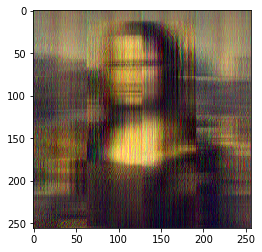

[[2.526250867319405, 54]]


In [13]:
result = []
name="MonaLisa256.jpg"
n = 8
m = 8
p = 64
alpha = 0.0005 
err = 5000

# for i in np.arange(0.0001, 0.001, 0.0001):
result.append(start(name=name, n=n, m=m, p=p, alpha=alpha, err=err))

print(result)